In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
complaints = pd.read_csv("no_bia_with_officer_information.csv")

In [3]:
complaints.head()

Unnamed: 0   LOG_NO           COMPLAINT_DATE ASSIGNMENT  CASE_TYPE  \
0           4  1092325  2019-01-11T15:18:16.000       COPA  Complaint   
1          16  1092312  2019-01-11T00:50:55.000       COPA  Complaint   
2          22  1092306  2019-01-10T14:09:40.000       COPA  Complaint   
3          23  1092305  2019-01-10T13:55:51.000       COPA  Complaint   
4          24  1092304  2019-01-10T13:24:46.000       COPA  Complaint   

          CURRENT_STATUS            CURRENT_CATEGORY FINDING_CODE  \
0  Pending Investigation             Excessive Force          NaN   
1  Pending Investigation             Excessive Force          NaN   
2  Pending Investigation       Operational Violation          NaN   
3  Pending Investigation  Unlawful Denial of Counsel          NaN   
4  Pending Investigation                 Civil Suits          NaN   

  POLICE_SHOOTING  BEAT  ... num_unknown_officers num_white_officers  \
0              No  1132  ...                  NaN                NaN   
1              No  1114  ...                  NaN                NaN   
2              No   411  ...                  NaN                NaN   
3              No  1933  ...                  0.0                0.0   
4              No   835  ...                  0.0                4.0   

  num_police_officers num_black_complainants num_native_complainants  \
0                 NaN                    2.0                     0.0   
1                 NaN                    1.0                     0.0   
2                 NaN                    1.0                     0.0   
3                 1.0                    0.0                     0.0   
4                 6.0                    0.0                     0.0   

  num_asian_complainants num_hispanic_complainants  num_unknown_complainants  \
0                    0.0                       0.0                       0.0   
1                    0.0                       0.0                       0.0   
2                    0.0                       0.0                       0.0   
3                    0.0                       1.0                       0.0   
4                    0.0                       0.0                       1.0   

   num_white_complainants  num_complainants  
0                     0.0               2.0  
1                     0.0               1.0  
2                     0.0               1.0  
3                     0.0               1.0  
4                     0.0               1.0  

[5 rows x 34 columns]

In [4]:
complaints.shape

(23556, 34)

In [5]:
'''
Compute the %missing for each columns in the dataset
'''

complaints.isnull().sum()/len(complaints)*100

Unnamed: 0                              0.000000
LOG_NO                                  0.000000
COMPLAINT_DATE                          0.000000
ASSIGNMENT                              0.000000
CASE_TYPE                               0.000000
CURRENT_STATUS                          0.000000
CURRENT_CATEGORY                        0.305655
FINDING_CODE                            5.043301
POLICE_SHOOTING                         0.000000
BEAT                                    0.000000
RACE_OF_COMPLAINANTS                    6.469689
SEX_OF_COMPLAINANTS                     6.469689
AGE_OF_COMPLAINANTS                     6.469689
RACE_OF_INVOLVED_OFFICERS              25.938190
SEX_OF_INVOLVED_OFFICERS               25.938190
AGE_OF_INVOLVED_OFFICERS               25.938190
YEARS_ON_FORCE_OF_INVOLVED_OFFICERS    25.938190
COMPLAINT_HOUR                          0.000000
COMPLAINT_DAY                           0.000000
COMPLAINT_MONTH                         0.000000
num_black_officers  

# FILTER OUT ROWS THAT HAVE EMPTY VALUES FOR 'RACE_OF_COMPLAINANTS' AND 'RACE_OF_INVOLVED_OFFICERS' COLUMNS 

In [6]:
'''
The code below filters out rows that have empty values for 'RACE_OF_COMPLAINANTS' and 'RACE_OF_INVOLVED_OFFICERS'. In addition, Notifications and Misc
which are not complaints are also filtered out.
'''

notnull_offcier = complaints.RACE_OF_INVOLVED_OFFICERS.notnull()
notnull_complaintnant = complaints.RACE_OF_COMPLAINANTS.notnull()
not_notification = complaints.CASE_TYPE!='Notification'
not_misc = complaints.CASE_TYPE!='Misc'

#The filter only keeps rows that have non-null values in both RACE_OF_INVOLVED_OFFICERS and RACE_OF_COMPLAINANTS.
#In addition, "Notification" and 'Misc' case types are removed since they are not complaints.
boolean_filter = notnull_offcier & notnull_complaintnant & not_notification & not_misc

#apply the boolean filter to the original dataframe
filtered_complaints = complaints[boolean_filter]

#check for the number of null values for each column. All rows that meetthe condition are filtered out.
print(filtered_complaints.isnull().sum())

Unnamed: 0                               0
LOG_NO                                   0
COMPLAINT_DATE                           0
ASSIGNMENT                               0
CASE_TYPE                                0
CURRENT_STATUS                           0
CURRENT_CATEGORY                        40
FINDING_CODE                           869
POLICE_SHOOTING                          0
BEAT                                     0
RACE_OF_COMPLAINANTS                     0
SEX_OF_COMPLAINANTS                      0
AGE_OF_COMPLAINANTS                      0
RACE_OF_INVOLVED_OFFICERS                0
SEX_OF_INVOLVED_OFFICERS                 0
AGE_OF_INVOLVED_OFFICERS                 0
YEARS_ON_FORCE_OF_INVOLVED_OFFICERS      0
COMPLAINT_HOUR                           0
COMPLAINT_DAY                            0
COMPLAINT_MONTH                          0
num_black_officers                       0
num_native_officers                      0
num_asian_officers                       0
num_hispani

All rows with null values in 'RACE_OF_INVOLVED_OFFICERS' and 'RACE_OF_COMPLAINANTS' have been dropped

In [7]:
'''
All notificaitons and misc case types have been filtered out.
'''

filtered_complaints.CASE_TYPE.unique()

array(['Complaint'], dtype=object)

# ANALYZING THE NUMBER OF POLICE OFFICERS INVOLVED IN COMPLAINTS

<b> FINDINGS: </b>

1. Approximately 94% of complaints involve 3 or less police officers
2. 66% of complaints only involve 1 police officer.
3. 22% of complaints involve 2 police officers.
4. 11569 complaints inolve only 1 police officer.
5. 3867 complaints involve 2 police officers.
6. 1034 complaints involve 3 police officers.

In [8]:
'''
Distribution of the number of police officers involved in a single complaint.

INTERPRETATION EXAMPLE:

1. 11569 complaints involve only 1 police officer.
2. 3867 complaints involve 2 police officers.
3. 1034 complaints involve 3 police officers.
'''

num_officers_involved = filtered_complaints.num_police_officers.value_counts().sort_index()
num_officers_involved

1.0     6046
2.0     3218
3.0      912
4.0      442
5.0      174
6.0       84
7.0       82
8.0       32
9.0       22
10.0      21
11.0      16
12.0      10
13.0       5
14.0       4
15.0       5
16.0       2
18.0       1
19.0       1
22.0       2
23.0       1
32.0       1
49.0       1
Name: num_police_officers, dtype: int64

Text(0, 0.5, 'Total Number of Officers')

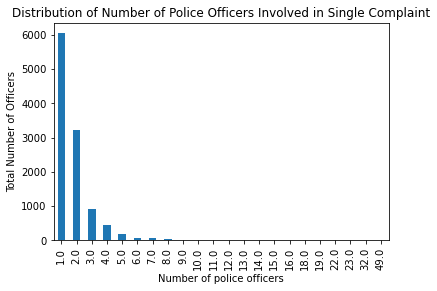

In [9]:
num_officers_involved.plot(kind='bar')
plt.title("Distribution of Number of Police Officers Involved in Single Complaint")
plt.xlabel("Number of police officers")
plt.ylabel("Total Number of Officers")

In [10]:
'''
The code below shows the relative frequency distribution for the number of police officers involved in a single complaint.

INTERPRETATION EXAMPLE:

1. 66% of complaints involve 1 police officer.
2. 22% of complaints involve 2 police officers.
3. 6% of complaints involve 3 police officers.
'''

num_officers_involved/num_officers_involved.sum()*100

1.0     54.556939
2.0     29.038080
3.0      8.229561
4.0      3.988450
5.0      1.570114
6.0      0.757986
7.0      0.739939
8.0      0.288757
9.0      0.198520
10.0     0.189496
11.0     0.144378
12.0     0.090236
13.0     0.045118
14.0     0.036095
15.0     0.045118
16.0     0.018047
18.0     0.009024
19.0     0.009024
22.0     0.018047
23.0     0.009024
32.0     0.009024
49.0     0.009024
Name: num_police_officers, dtype: float64

In [11]:
'''
Relative frequency distribution of the number of complainants in a single complaint.
'''

num_comp = filtered_complaints.num_complainants.sort_values().value_counts()
num_comp/num_comp.sum()*100

1.0     82.241473
2.0     12.587981
3.0      3.086086
4.0      1.326475
5.0      0.478253
6.0      0.126331
7.0      0.054142
8.0      0.054142
9.0      0.018047
11.0     0.009024
13.0     0.009024
15.0     0.009024
Name: num_complainants, dtype: float64

# CORRELATION MATRIX FOR OFFICER AND COMPLIANANT RACES (STANDARDIZED)

<b>The purpose of this section is to determine correlations between the races of complainants and officers. </b>

<font size="4"> <b> SUMMARY OF FINDINGS IN CORREALATION STUDY (PRELIMINARY) </b> </font>



In [12]:
'''
NOTE: This project is a work in progress, and the results are preliminary.

Below is a table showing the correlation between complainants and officers' races.

METHODOLOGY:

Spearman's correlation coefficient was used because the metric does not assume normality 
between independent and dependent variables. Furthermore, the p-value calculation does not assume normality.

INTERPRETATION OF FINDINGS:

1. The more black complainants are involved, the greater number of black police officers are involved.
2. The more Hispanic complainants are involved, the greater number of Hispanic police officers are involved.
3. The more white complainants are involved, the greater number of white police officers are involved.
4. The more Hispanic complainants are involved, the lesser number of black police officers get involved.
5. The more white complainants are involved, the lesser number of black police officers get involved.

All three have a weak correlation but are statistically significant 
due to extremely small p-values. 


'''

pd.DataFrame({'complainant_percent':['black','hispanic','white','hispanic','white'],
              'officer_percent':['black','hispanic','white','black','black'],
              'Spearman correlation coefficient':[0.25,0.17,0.16,-0.17,-0.15],
              'p-value':['1.47e-158','1.79e-75','4.40e-63','2.80e-76','3.34e-58'],
              'significance?':['SIGNIFICANT RESULT','SIGNIFICANT RESULT','SIGNIFICANT RESULT','SIGNIFICANT RESULT','SIGNIFICANT RESULT']})

complainant_percent officer_percent  Spearman correlation coefficient  \
0               black           black                              0.25   
1            hispanic        hispanic                              0.17   
2               white           white                              0.16   
3            hispanic           black                             -0.17   
4               white           black                             -0.15   

     p-value       significance?  
0  1.47e-158  SIGNIFICANT RESULT  
1   1.79e-75  SIGNIFICANT RESULT  
2   4.40e-63  SIGNIFICANT RESULT  
3   2.80e-76  SIGNIFICANT RESULT  
4   3.34e-58  SIGNIFICANT RESULT

In [13]:
from scipy.stats import spearmanr

In [14]:
'''
Standardizes the race count columns for complainants 
and officer races. The code below converts race columns into percentages.

EXAMPLE: Given the COLUMNS below:

num_hispanic_complainants  num_white_complainants   num_complianants   num_black_officers   num_white_officers  num_officers
          2                        3                      5                   3                    5                8

The rows above will be converted to:

hispanic_complainants_percent    white_complainants_percent     black_officers_percent    white_officers_percent
    2/5 = 40%                         3/5  = 60%                      3/8 = 37.5%              5/8 = 62.5%
'''

officer_races = ['num_black_officers','num_native_officers','num_asian_officers',
                 'num_hispanic_officers','num_unknown_officers','num_white_officers']

for officer_race in officer_races:
    filtered_complaints[officer_race[4:]+'_percent'] = filtered_complaints[officer_race]/filtered_complaints['num_police_officers']*100


complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                       'num_hispanic_complainants','num_unknown_complainants','num_white_complainants']

for complainant_race in complaintnant_races:
    filtered_complaints[complainant_race[4:]+'_percent'] = filtered_complaints[complainant_race]/filtered_complaints['num_complainants']*100

C:\Users\ANGELO~1\AppData\Local\Temp/ipykernel_2852/3304724667.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complaints[officer_race[4:]+'_percent'] = filtered_complaints[officer_race]/filtered_complaints['num_police_officers']*100
C:\Users\ANGELO~1\AppData\Local\Temp/ipykernel_2852/3304724667.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complaints[complainant_race[4:]+'_percent'] = filtered_complaints[complainant_race]/filtered_complaints['num_complainants']*100


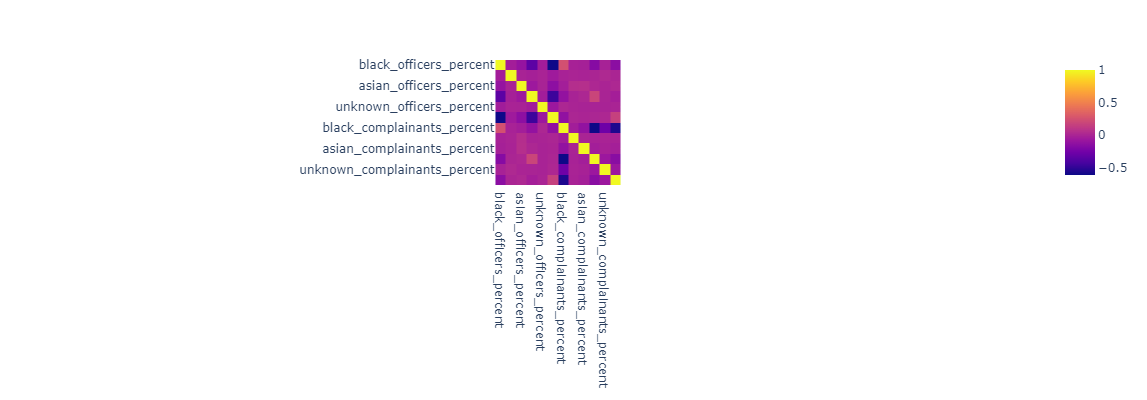

In [15]:
'''
Pearsons correlation matrix between race of % complainants and % officers.
'''

filter_cols = filtered_complaints.columns[34:]

race_only = filtered_complaints[filter_cols].corr()

px.imshow(race_only,width=800, height=400)

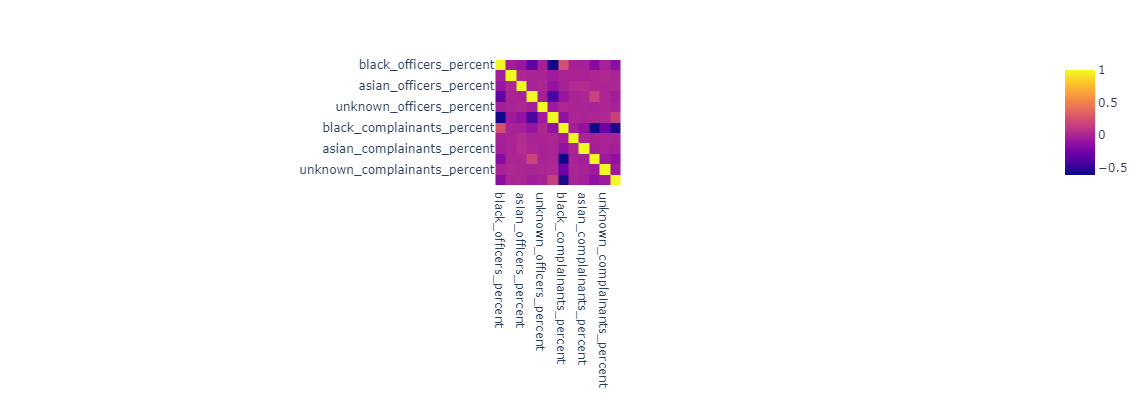

In [16]:
'''
Spearman's correlation matrix between race of % complainants and % officers.
'''

filter_cols = filtered_complaints.columns[34:]

race_only = filtered_complaints[filter_cols].corr(method='spearman')

px.imshow(race_only,width=800, height=400)

SpearmanrResult(correlation=0.25080355222253364, pvalue=1.4710339851136814e-158)


<AxesSubplot:xlabel='black_complainants_percent', ylabel='black_officers_percent'>

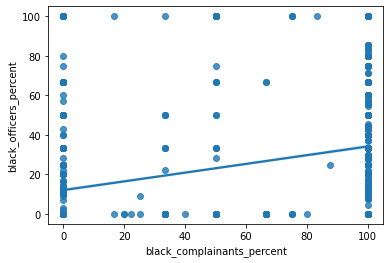

In [17]:
'''
black_complainants_percent vs. black_officers_percent

SpearmanrResult(correlation=0.25080355222253364, pvalue=1.4710339851136814e-158)
'''

r_black = spearmanr(filtered_complaints.black_complainants_percent,filtered_complaints.black_officers_percent)
print(r_black)
sns.regplot(data=filtered_complaints, x='black_complainants_percent',y='black_officers_percent')

SpearmanrResult(correlation=0.1733228608617746, pvalue=1.7935709043535574e-75)


<AxesSubplot:xlabel='hispanic_complainants_percent', ylabel='hispanic_officers_percent'>

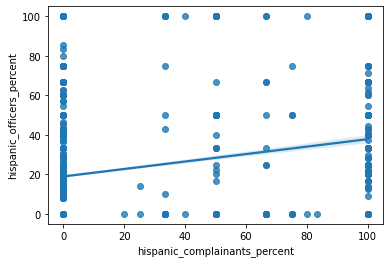

In [18]:
'''
hispanic_complainants_percent vs. hispanic_officers_percent

SpearmanrResult(correlation=0.1733228608617746, pvalue=1.7935709043535574e-75)
'''

r_hispanic = spearmanr(filtered_complaints.hispanic_complainants_percent,filtered_complaints.hispanic_officers_percent)
print(r_hispanic)
sns.regplot(data=filtered_complaints, x='hispanic_complainants_percent',y='hispanic_officers_percent')

SpearmanrResult(correlation=0.15826798777912449, pvalue=4.4056382291695707e-63)


<AxesSubplot:xlabel='white_complainants_percent', ylabel='white_officers_percent'>

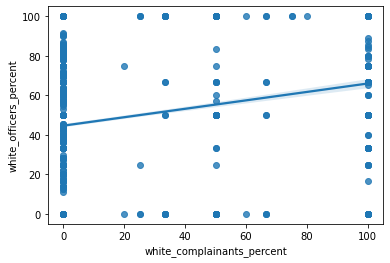

In [19]:
'''
white_complainants_percent vs. white_officers_percent

SpearmanrResult(correlation=0.15826798777912449, pvalue=4.4056382291695707e-63)
'''

r_white = spearmanr(filtered_complaints.white_complainants_percent,filtered_complaints.white_officers_percent)
print(r_white)
sns.regplot(data=filtered_complaints, x='white_complainants_percent',y='white_officers_percent')

SpearmanrResult(correlation=-0.17425534481387886, pvalue=2.8009639768461656e-76)


<AxesSubplot:xlabel='hispanic_complainants_percent', ylabel='black_officers_percent'>

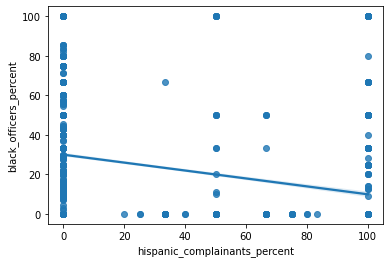

In [20]:
'''
hispanic_complainants_percent vs. black_officers_percent

SpearmanrResult(correlation=-0.17425534481387886, pvalue=2.8009639768461656e-76)
'''

r_5 = spearmanr(filtered_complaints.hispanic_complainants_percent,filtered_complaints.black_officers_percent)
print(r_5)
sns.regplot(data=filtered_complaints, x='hispanic_complainants_percent',y='black_officers_percent')

SpearmanrResult(correlation=-0.15190808500268096, pvalue=3.349564974999276e-58)


<AxesSubplot:xlabel='white_complainants_percent', ylabel='black_officers_percent'>

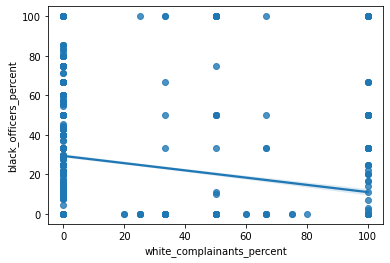

In [21]:
'''
white_complainants_percent vs. black_officers_percent

SpearmanrResult(correlation=-0.15190808500268096, pvalue=3.349564974999276e-58)
'''

r_7 = spearmanr(filtered_complaints.white_complainants_percent,filtered_complaints.black_officers_percent)
print(r_7)
sns.regplot(data=filtered_complaints, x='white_complainants_percent',y='black_officers_percent')

# ANALYZING RACE INTERACTION BETWEEN COMPLAINANTS AND OFFICERS 

This section aims to analyze the races of police officers and races of complainants involved in mistreatment allegations.

Specifically, this section attempts to answer the following question: Are a particular race of complainants more likely to file a complaint against a particular race of police officers?

For example: Are whites more likely to file a complaint against Hispanic police officers?


METHODOLOGY:

The primary problem with performing the analysis described above is that there are often multiple complainants of different races in a single complaint. For example, a complaint can have 3 Asians, 2 Hispanics and 1 Black. This challenge makes it difficult to perform a straightforward analysis.

If a complaint has multiple races of complainants, how can we use these complaints to answer the question: are white complainants more likely to report Hispanic police officers? A solution I came up with is to use complaints where a large percentage of the complainants are of one race. The minimum percentage threshold is greater than or equal to 75%. So, for example, if we are trying to compute the race distribution of police officers if the complainants are black, then we will only include complaints where at least 75% of the complainants are black.

I created 6 new columns that represent the percentage makeup of the complainants for each race. This is computed in the previous section.

The following new columns will be created:
1. black_complainants_percent 
2. native_complainants_percent 
3. asian_complainants_percent   
4. hispanic_complainants_percent  
5. unknown_complainants_percent  
6. white_complainants_percent  
 
These 6 columns are computed for each complaint (each row).

For example, if white_complainants_percent = 50, and native_complianants_percent = 25, unknown_complainants_percent = 25, and the total number of complainants is 8. Then, the complainant composition are 4 whites, 2 natives, and 2 unknowns.


Steps for computation:

1. Filter for complaints where most complainants are of one race. The threshold to determine the majority is 75% of one race. For example, 75% of complainants are Hispanics.
2. After filtering, analyze the race distribution of police officers involved.






In [22]:
'''
Function for plotting the distribution of police officer's races grouped by the corresponding complainant race.

The plot was designed to answer the question: Are a particular race of complainants more likely to file a complaint against 
                                              a specific race of police officers?

Y-AXIS: % makeup of a specific officer to the total number of police officers reported.

X-AXIS: The complainant majority class refers to the race of complainants. 

Interpreting the graph goes like this:

    Look at the x-axis (complainant_majority_class), choose one, and let's take Whites. When the complainants are white, 65% of officers 
    reported are white, 20% of officers reported are Hispanic, 11% of officers reported are black, 3.2% of officers reported are Asian etc.
'''

def relative_frequency_grouped(majority_percentage=75):
    
    majority_columns = ['black_complainants_percent','native_complainants_percent','asian_complainants_percent',
                     'hispanic_complainants_percent','unknown_complainants_percent','white_complainants_percent']
    
    officer_columns = ['num_black_officers','num_native_officers','num_asian_officers',
                       'num_hispanic_officers','num_unknown_officers','num_white_officers']
    
    majority_name_dict = dict(zip(majority_columns,['Black','Native','Asian','Hispanic','Unknown','White']))
    
    temp_df_list = []
    
    for race_column in majority_columns:
        race_majority_only = filtered_complaints[filtered_complaints[race_column] >= majority_percentage]
        
        officer_sums = race_majority_only[officer_columns].sum()
        officer_sums_percent = officer_sums/race_majority_only['num_police_officers'].sum()*100
        
        temp_df = officer_sums_percent.to_frame().reset_index().rename(columns={'index':'percentage_officer', 0:'relative_freq'})
        temp_df['complianant_majority_class'] =  majority_name_dict[race_column] 
                      
        temp_df_list.append(temp_df)
    
    combined_df =  pd.concat(temp_df_list)
    
    return combined_df

def plot_relative_freq_grouped(combined_df):
    
    chart = px.bar(combined_df, x='complianant_majority_class', y="relative_freq",
             color='percentage_officer', barmode='group', height=400, width = 800, text_auto='.2s')
    
    chart.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
    
    chart.show()
    

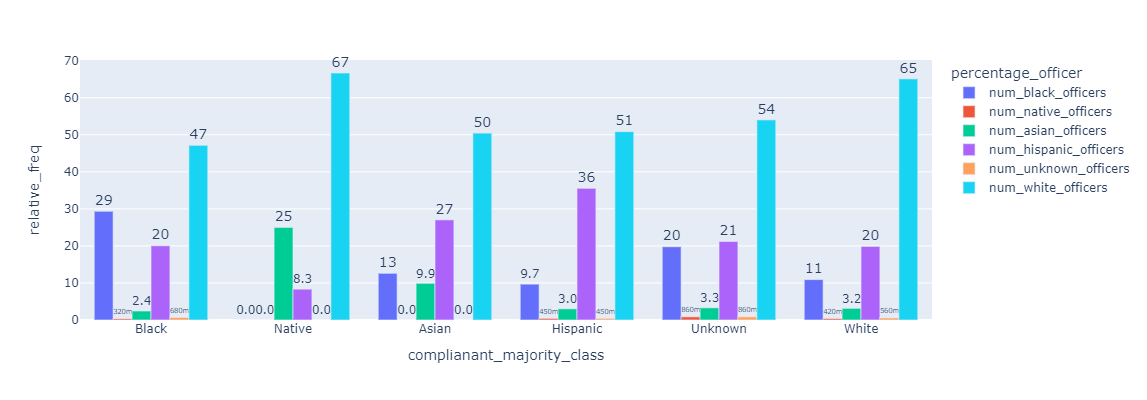

In [23]:
'''
NOTE: The findings on this plot is extensive and can be found on the readme.md on Github.

NOTE #2: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
         see the graph, download the jupyter notebook and run it on your local machine.

'''

plot_relative_freq_grouped(relative_frequency_grouped(majority_percentage=75))

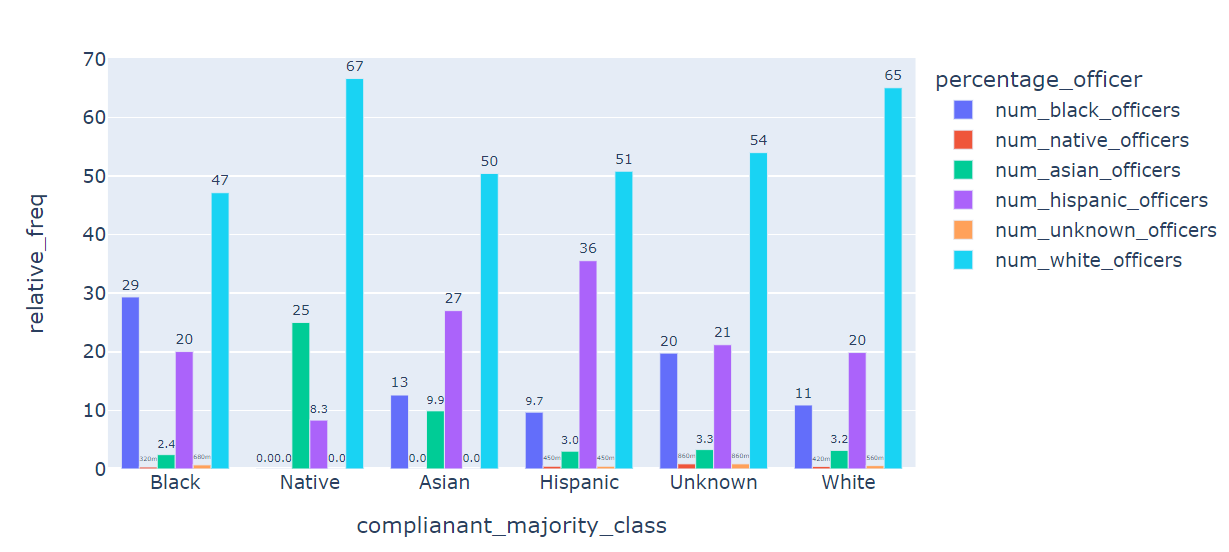

# TIME SERIES ANALYSIS OF RACES OF COMPLIANANTS 

In [24]:
'''
Convert a column to datetime and extract the year.
'''

#convert COMPLAINT_DATE columns to datetime
complaints['DATE'] = pd.to_datetime(complaints['COMPLAINT_DATE'])

#extract year from timestamp
complaints['year'] =  complaints['DATE'].dt.year



In [25]:
'''
Check for min-max range for dates per year.

FINDINGS: 

Incomplete data from 2007 and 2019. The typical date range for a year is about 365 days, whereas the date range for 2007 and 2019 is 121 
days and 9 days, respectively. These years are excluded in analysis involving time-series analysis of case counts.
'''

dates = pd.pivot(complaints,columns='year',values='DATE').agg(['min', 'max']).T
dates['min-max range'] = (dates['max'] - dates['min'])
dates

min                 max     min-max range
year                                                          
2007 2007-09-01 00:34:36 2007-12-31 17:03:20 121 days 16:28:44
2008 2008-01-01 01:48:30 2008-12-31 22:53:43 365 days 21:05:13
2009 2009-01-01 01:16:00 2009-12-31 13:52:23 364 days 12:36:23
2010 2010-01-01 02:34:38 2010-12-31 21:22:56 364 days 18:48:18
2011 2011-01-01 03:06:06 2011-12-31 23:37:04 364 days 20:30:58
2012 2012-01-01 00:58:26 2012-12-31 20:19:25 365 days 19:20:59
2013 2013-01-01 05:24:45 2013-12-31 20:52:42 364 days 15:27:57
2014 2014-01-01 01:14:34 2014-12-31 18:58:13 364 days 17:43:39
2015 2015-01-01 02:14:04 2015-12-31 11:21:18 364 days 09:07:14
2016 2016-01-01 03:10:18 2016-12-31 20:36:14 365 days 17:25:56
2017 2017-01-01 00:11:35 2017-12-28 17:57:51 361 days 17:46:16
2018 2018-01-01 00:23:31 2018-12-31 14:57:41 364 days 14:34:10
2019 2019-01-02 10:49:15 2019-01-11 15:18:16   9 days 04:29:01

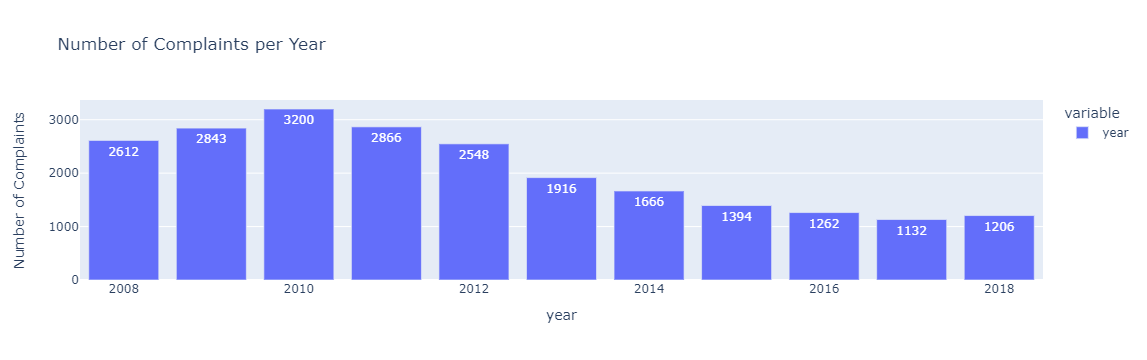

In [26]:
'''
Number of complaints per year between 2008 and 2018.
'''

#original = pd.read_csv(r"C:\Users\Angelo Gaerlan\Desktop\Data Science\Data Sets\Chicago COPA\chicago COPA cases 2021\copa-cases-summary.csv")
#original['COMPLAINT_DATE'] = pd.to_datetime(original.COMPLAINT_DATE)
#original['year'] = original.COMPLAINT_DATE.dt.year

year_filter = ~complaints.year.isin([2007,2019])

num_complaints_yearly = complaints[year_filter].year.value_counts().sort_index()
yearly_complaints = px.bar(num_complaints_yearly,text_auto=True,title='Number of Complaints per Year')

yearly_complaints.update_layout(xaxis_title="year", yaxis_title="Number of Complaints")
yearly_complaints.show()

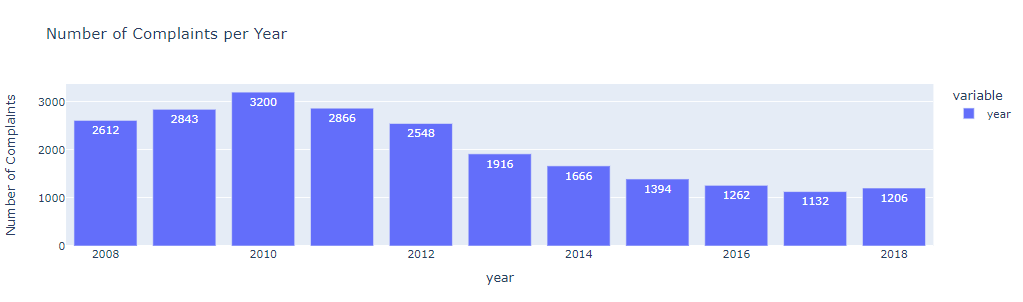

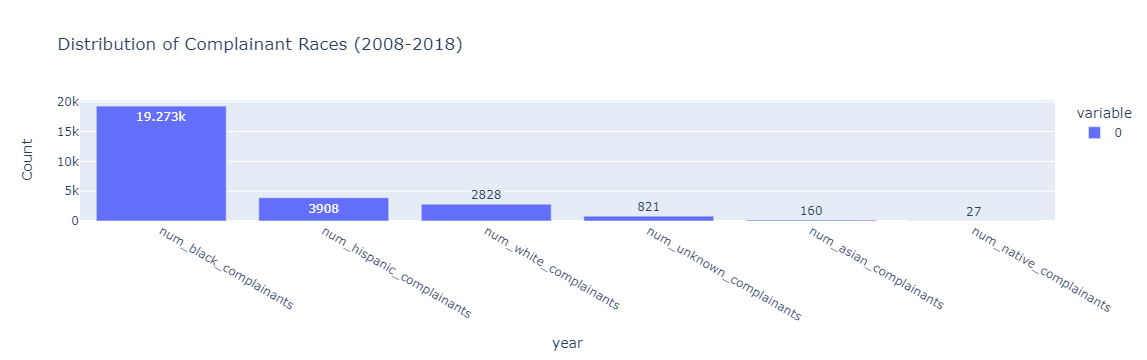

In [27]:
'''
Race distribution of complainants between 2008 and 2018. This analysis combines all the complaints between 2008 and 2018 inclusive.

NOTE: The findings on this plot can be found on the readme.md on Github.
'''
complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                       'num_hispanic_complainants','num_unknown_complainants','num_white_complainants']

race_distribution = complaints[complaintnant_races].sum().sort_values(ascending=False)

bar_race_dist = px.bar(race_distribution,text_auto=True,title='Distribution of Complainant Races (2008-2018)')

bar_race_dist.update_layout(xaxis_title="year", yaxis_title="Count")

bar_race_dist.show()

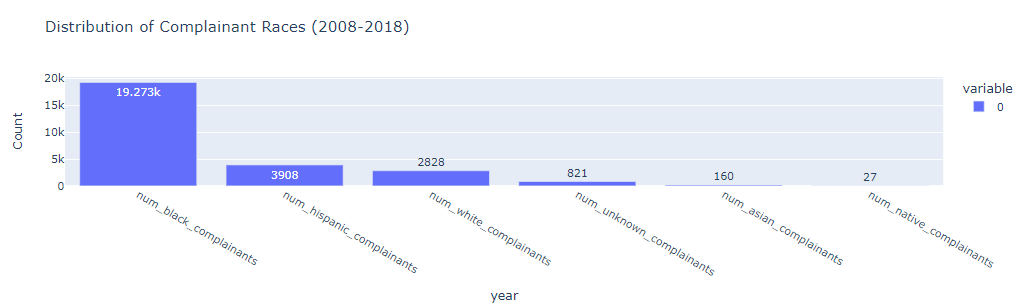

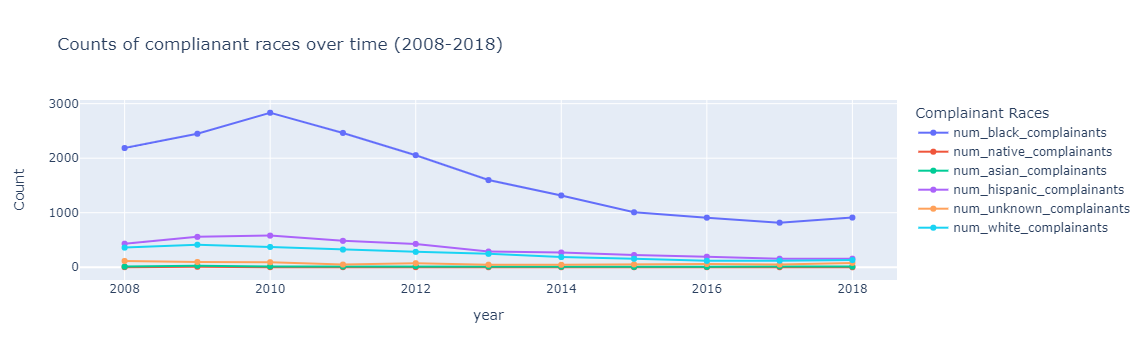

In [28]:
'''
Plot counts of different COMPLAINANT races over time. This graph combines all complainants between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.
      
NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''
condition_1 = complaints.RACE_OF_COMPLAINANTS.notnull()
condition_2 = ~complaints.year.isin([2007,2019])
only_complianants = complaints[condition_1 & condition_2]


complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                       'num_hispanic_complainants','num_unknown_complainants','num_white_complainants']

time_grouped = only_complianants.groupby('year')[complaintnant_races].sum()

time_chart = px.line(time_grouped,markers=True,title='Counts of complianant races over time (2008-2018)')

time_chart.update_layout(xaxis_title="year", yaxis_title="Count",legend_title="Complainant Races")

time_chart.show() 

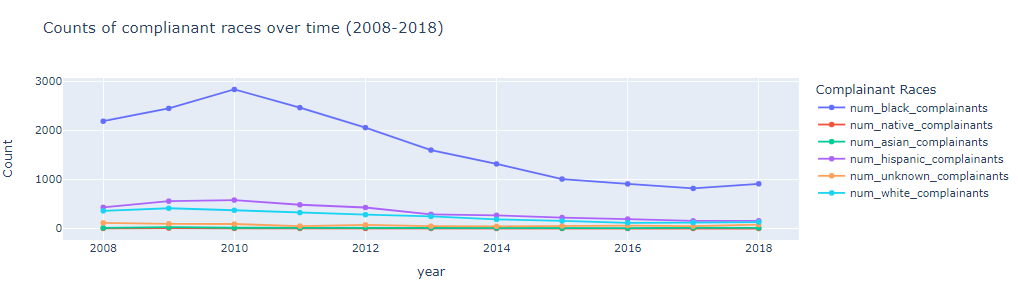

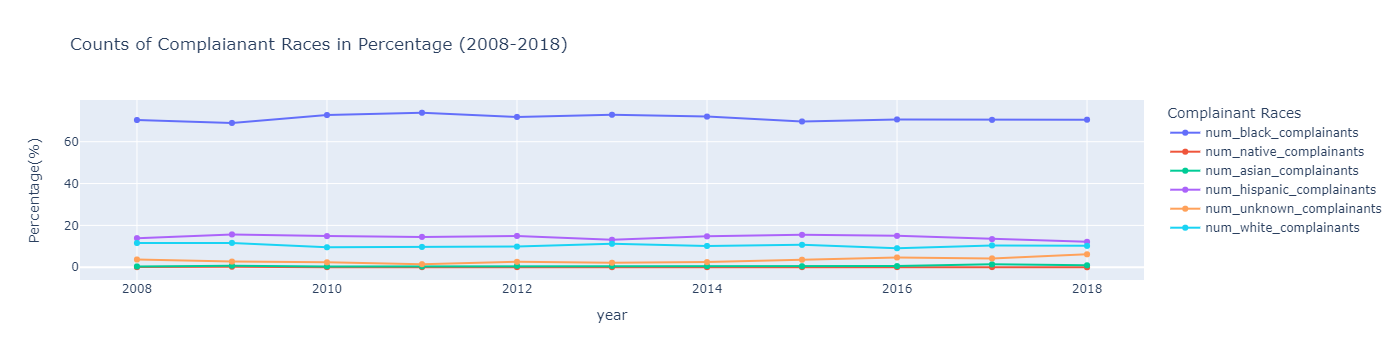

In [77]:
'''
Plots the relative frequency of complainant races over time.

Interpreting the graph goes like this: in 2010, 72.73% of complainants are black (blue line) and 14.80% are hispanic (purple line).

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.
      
NOTE #2: The findings on this plot can be found on the readme.md on Github..
'''

time_grouped_relative = time_grouped.copy()

time_grouped_relative['num_complainants'] = time_grouped_relative.sum(axis=1)

time_grouped_relative = time_grouped_relative.divide(time_grouped_relative['num_complainants'],axis=0).drop('num_complainants',axis=1)*100

relative_chart = px.line(time_grouped_relative,markers=True,title='Counts of Complaianant Races in Percentage (2008-2018)')

relative_chart.update_layout(xaxis_title="year", yaxis_title="Percentage(%)",legend_title="Complainant Races")
   

relative_chart.show() 


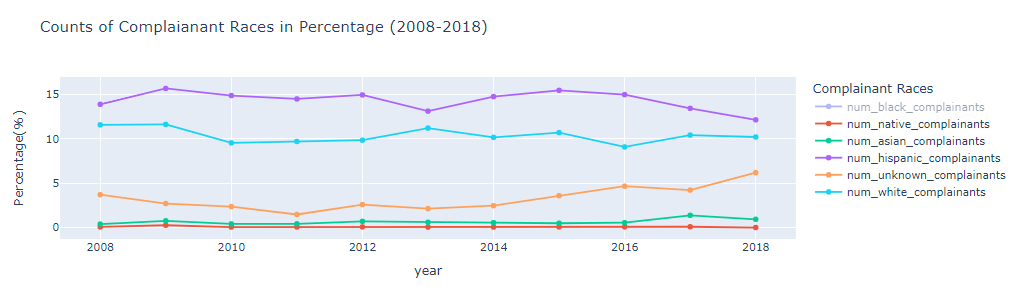

In [30]:
'''
Summary statistics for the relative frequencies of complainant races.
'''


minmax = time_grouped_relative.agg(['mean','std','min','max']).T
minmax['range'] =  (minmax['max'] - minmax['min']).abs()
minmax

mean       std        min        max     range
num_black_complainants     71.254575  1.501455  68.957746  73.830935  4.873189
num_native_complainants     0.075674  0.063134   0.000000   0.253521  0.253521
num_asian_complainants      0.650172  0.292724   0.386225   1.379310  0.993086
num_hispanic_complainants  14.357513  1.080870  12.151703  15.690141  3.538438
num_unknown_complainants    3.281773  1.358459   1.468825   6.191950  4.723126
num_white_complainants     10.380292  0.835481   9.090909  11.633803  2.542894

# TIME SERIES ANALYSIS OF RACES OF COMPLIANANTS (BY MISTREATMENT ALLEGATION)

In [31]:
'''
Filter out complaints that have empty values for RACE_OF_COMPLIANANTS. Furthermore, filter out complaints reported in 2007 or 2019.
'''

condition_1 = complaints.RACE_OF_COMPLAINANTS.notnull()
condition_2 = ~complaints.year.isin([2007,2019])

clean_data = complaints[condition_1 & condition_2]

In [32]:
'''
The code below gets the total number of mistreatment allegations between 2008 and 2018.
'''

clean_data.CURRENT_CATEGORY.value_counts()

Excessive Force                  7894
Taser Notification               4520
Miscellaneous                    2656
Verbal Abuse                     1327
Unnecessary Display of Weapon     954
Civil Suits                       640
Domestic Violence                 600
Search or Seizure                 537
Firearm Discharge - Hits          438
Death or Injury In Custody        409
OC Discharge                      383
Firearm Discharge - No Hits       263
Coercion                          158
Taser Discharge                    94
Operational Violation              89
Firearm Discharge at Animal        64
Motor Vehicle Related Death        45
Legal Violation                    20
Bias                               15
Unlawful Denial of Counsel          9
Name: CURRENT_CATEGORY, dtype: int64

In [33]:
'''
Plots a graph that shows the number of complainants of all complainant races involved in SPECIFIC mistreatment allegations over time.

PARAMS:

1. allegation_type - The specific type of mistreatment allegation to be plotted. The mistreatment allegations must be valid; otherwise, the function will return False.
                     
2. relative - Takes in either True or False. If True, the relative frequency is computed. If False, the number of occurrences are computed.
'''

def plot_allegation_over_time(allegation_type,relative=False):
    
    
    if allegation_type not in ['Miscellaneous', 'Excessive Force', 'Search or Seizure',
                               'Unnecessary Display of Weapon', 'Domestic Violence',
                               'Death or Injury In Custody', 'Bias',
                               'Firearm Discharge - No Hits', 'Operational Violation',
                               'Verbal Abuse', 'Civil Suits', 'Firearm Discharge - Hits',
                               'Firearm Discharge at Animal', 'Coercion',
                               'Unlawful Denial of Counsel', 'Taser Notification',
                               'Motor Vehicle Related Death', 'Taser Discharge', 'OC Discharge',
                                'Legal Violation']:
        
        print('invalid type of mistreatment allegation')
        return False
    
    if relative not in [True, False]:
        print('relative parameter must be either True or False')
        return False
    
    condition_1 = complaints.RACE_OF_COMPLAINANTS.notnull()
    condition_2 = ~complaints.year.isin([2007,2019])
    clean_data = complaints[condition_1 & condition_2] 
    
    complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                           'num_hispanic_complainants','num_unknown_complainants','num_white_complainants',
                           'num_complainants']

    time_grouped_by_allegation = clean_data.groupby(['year','CURRENT_CATEGORY'])[complaintnant_races].sum().reset_index()
    
    if relative==False:
        data = time_grouped_by_allegation[time_grouped_by_allegation['CURRENT_CATEGORY']==allegation_type].drop(['CURRENT_CATEGORY','num_complainants'],axis=1).set_index('year')
        chart = px.line(data,markers=True, title='complainant races involved in {} over time'.format(allegation_type.upper()))
        chart.update_layout(xaxis_title="year", yaxis_title="Count",legend_title="Complainant Races")
        chart.show()
    elif relative==True:
        data =  time_grouped_by_allegation[time_grouped_by_allegation['CURRENT_CATEGORY']==allegation_type].drop(['CURRENT_CATEGORY'],axis=1).set_index('year')
        data_final = data.divide(data['num_complainants'],axis=0).drop('num_complainants',axis=1)*100
        chart = px.line(data_final,markers=True,title='complainant races involved in {} over time in percentage'.format(allegation_type.upper()))
        chart.update_layout(xaxis_title="year", yaxis_title="Percentage(%)",legend_title="Complainant Races")
        chart.show()
    
        
    
   
    

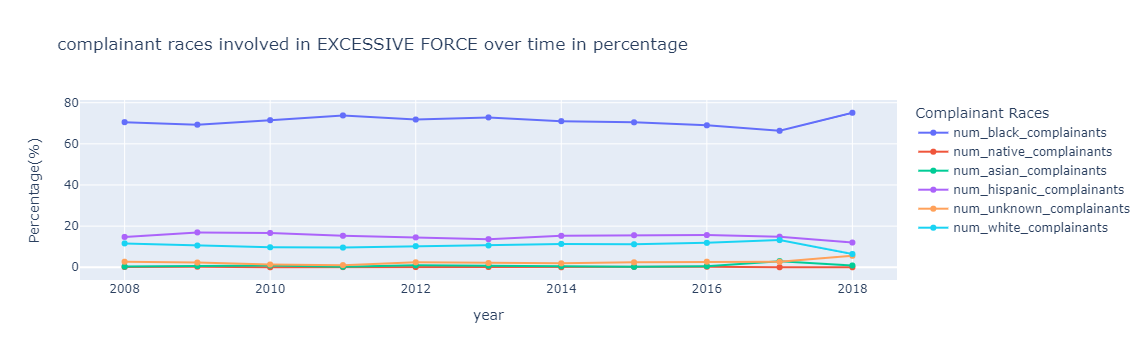

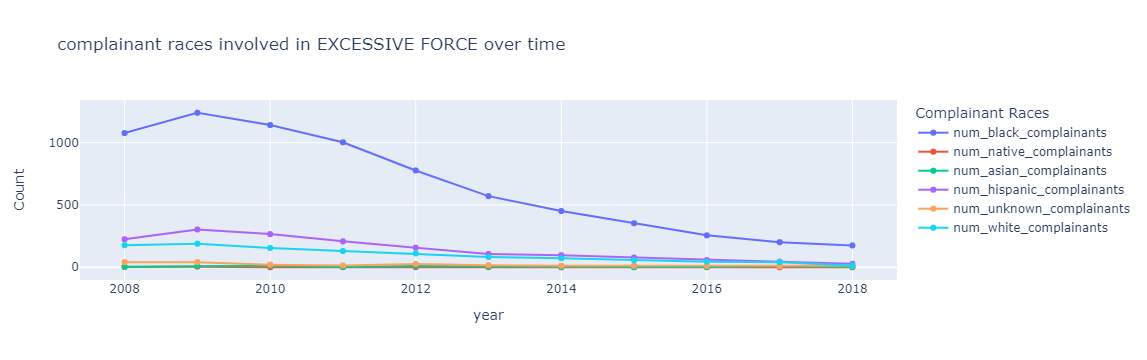

In [34]:
'''
Plots the number of complainants and the relative frequency of complainants involved in EXCESSIVE FORCE complaints between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Excessive Force',relative=True)
plot_allegation_over_time('Excessive Force',relative=False)

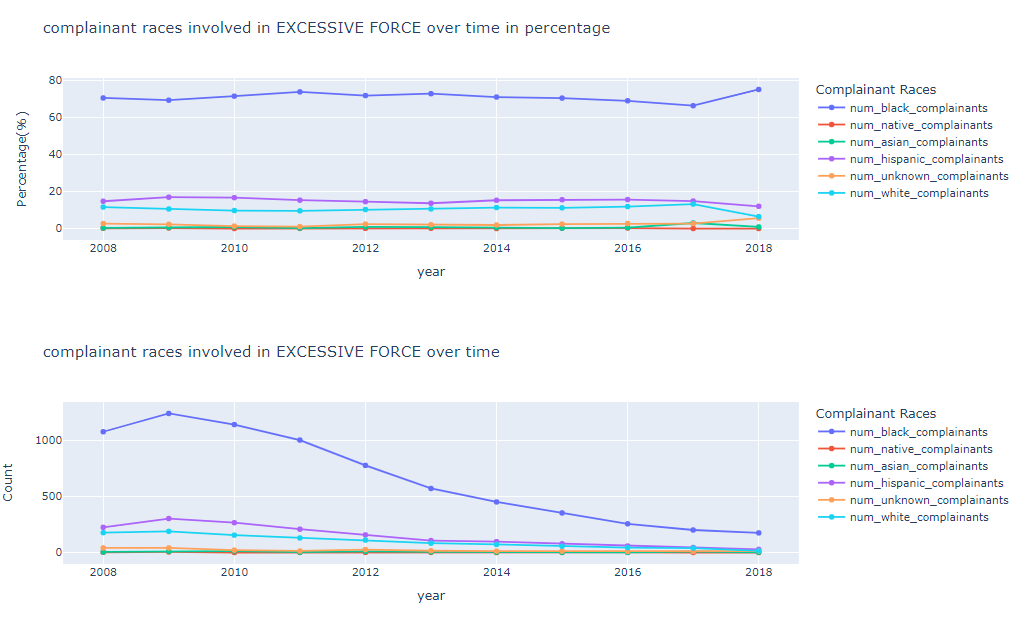

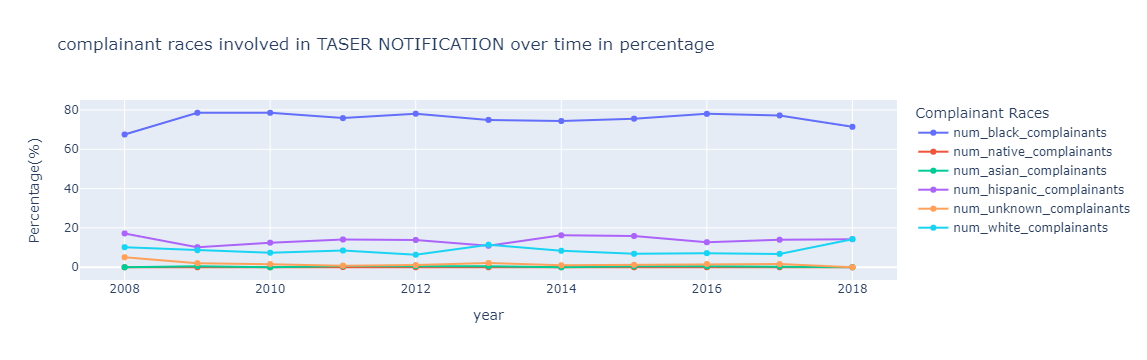

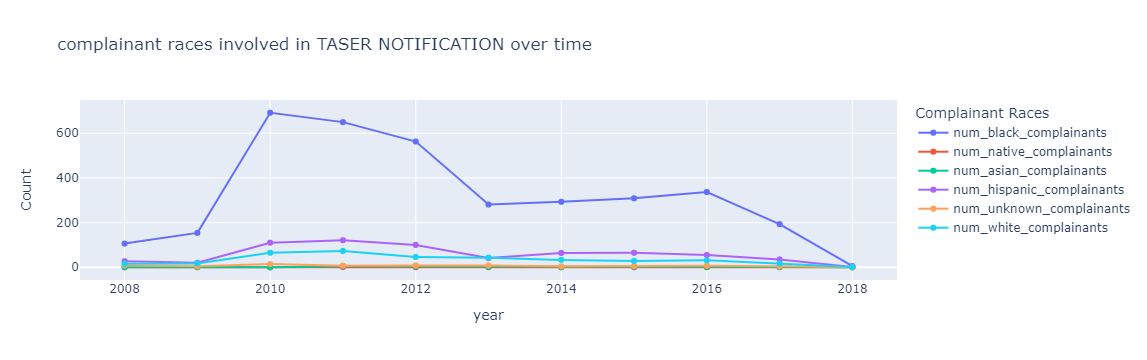

In [69]:
'''
Plots the number of complainants and the relative frequency of complainants involved TASER NOTIFICATION complaints between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Taser Notification',relative=True)
plot_allegation_over_time('Taser Notification',relative=False)

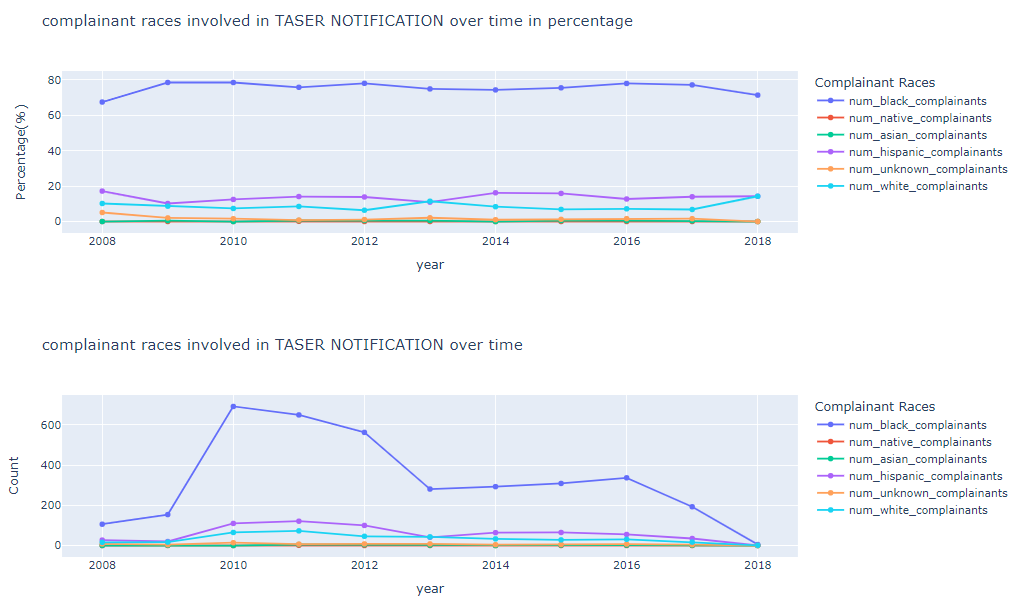

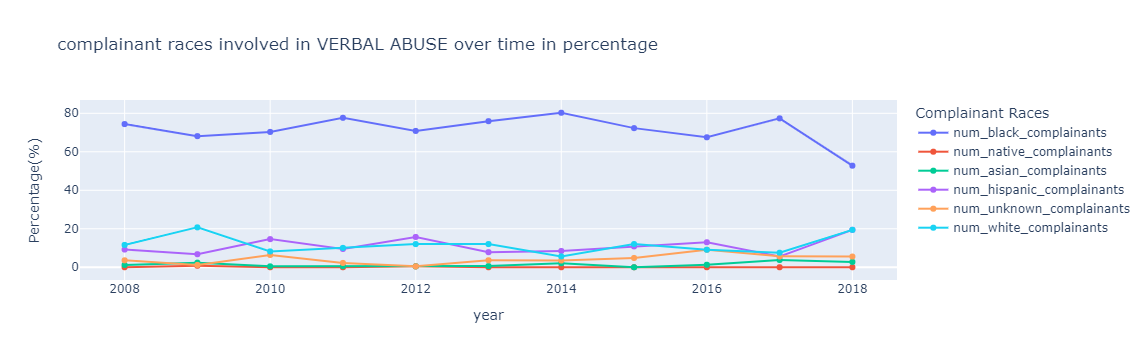

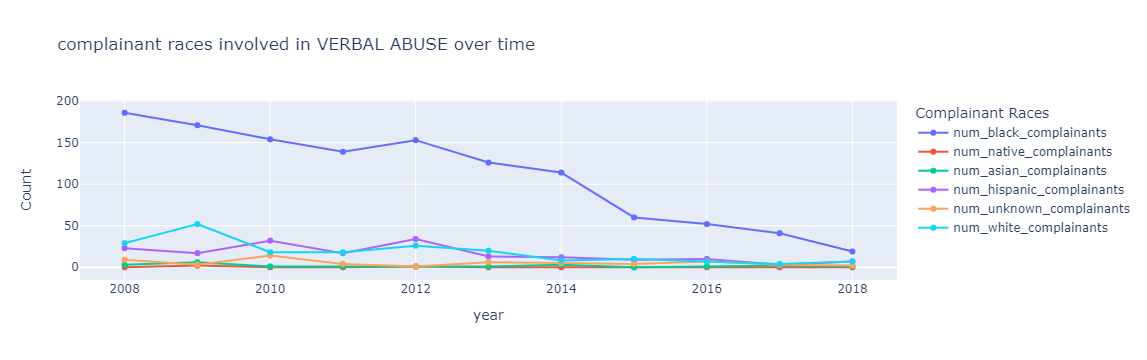

In [70]:
'''
Plots the number of complainants and the relative frequency of complainants involved VERBAL ABUSE between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Verbal Abuse',relative=True)
plot_allegation_over_time('Verbal Abuse',relative=False)

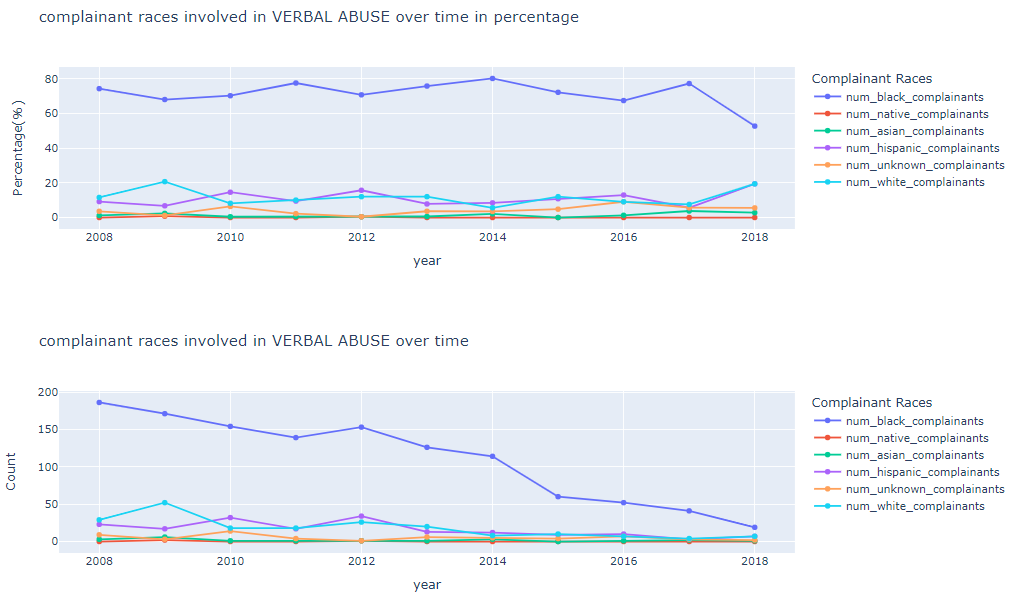

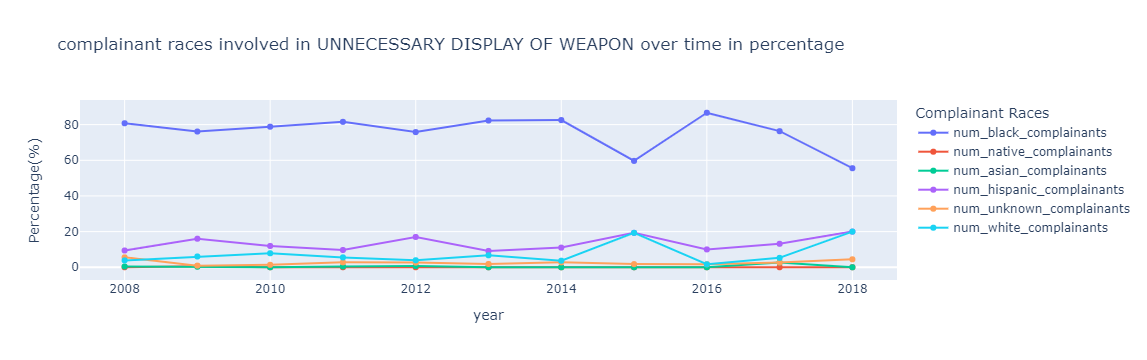

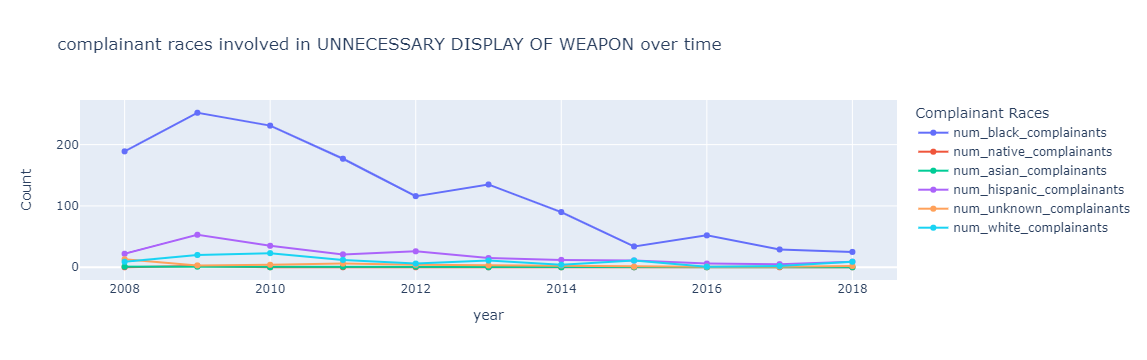

In [71]:
'''
Plots the number of complainants and the relative frequency of complainants involved UNNECESSARY DISPLAY OF WEAPON between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.
      
NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Unnecessary Display of Weapon',relative=True)
plot_allegation_over_time('Unnecessary Display of Weapon',relative=False)

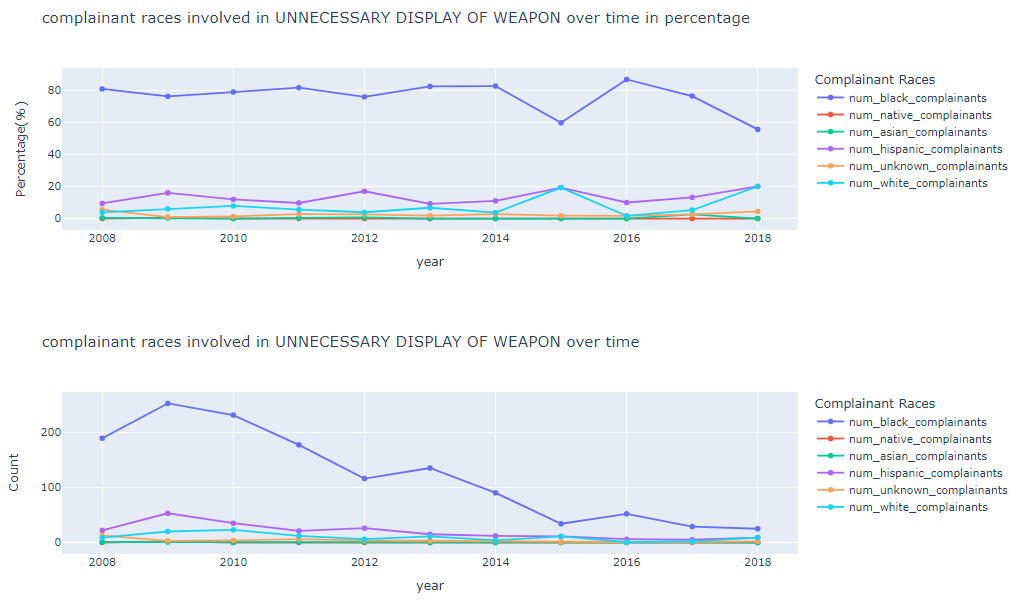

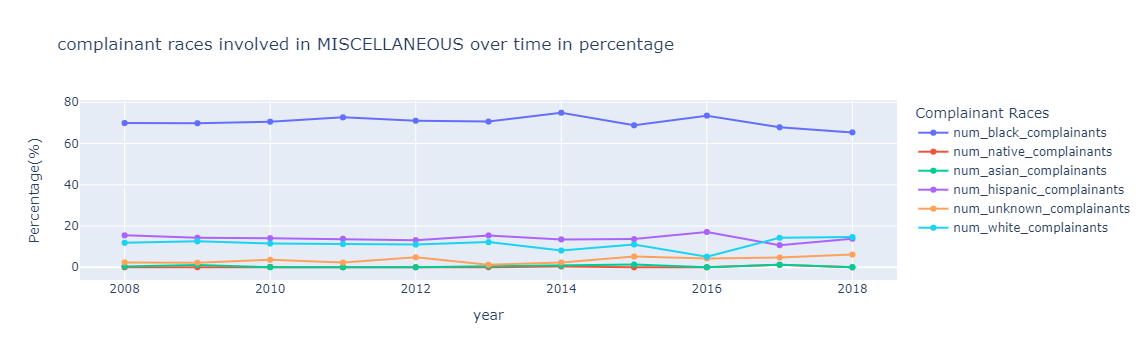

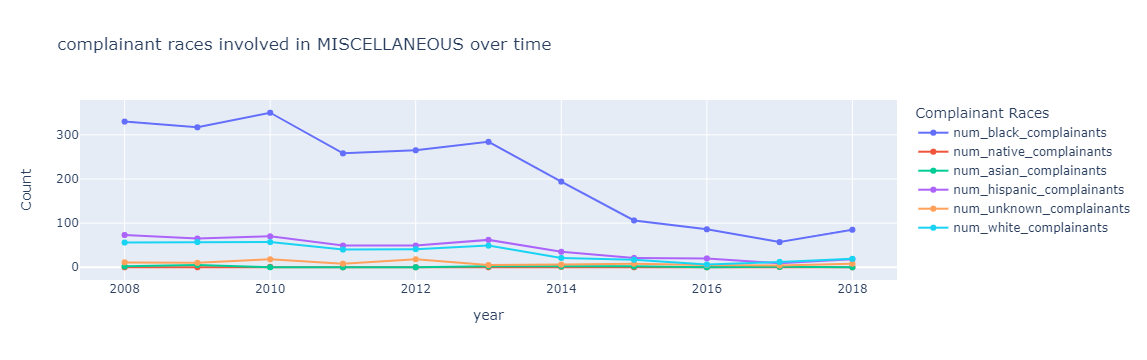

In [72]:
'''
Plots the number of complaiants and the relative frequency of complianants involved MISCELLANEOUS complaints between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Miscellaneous',relative=True)
plot_allegation_over_time('Miscellaneous',relative=False)

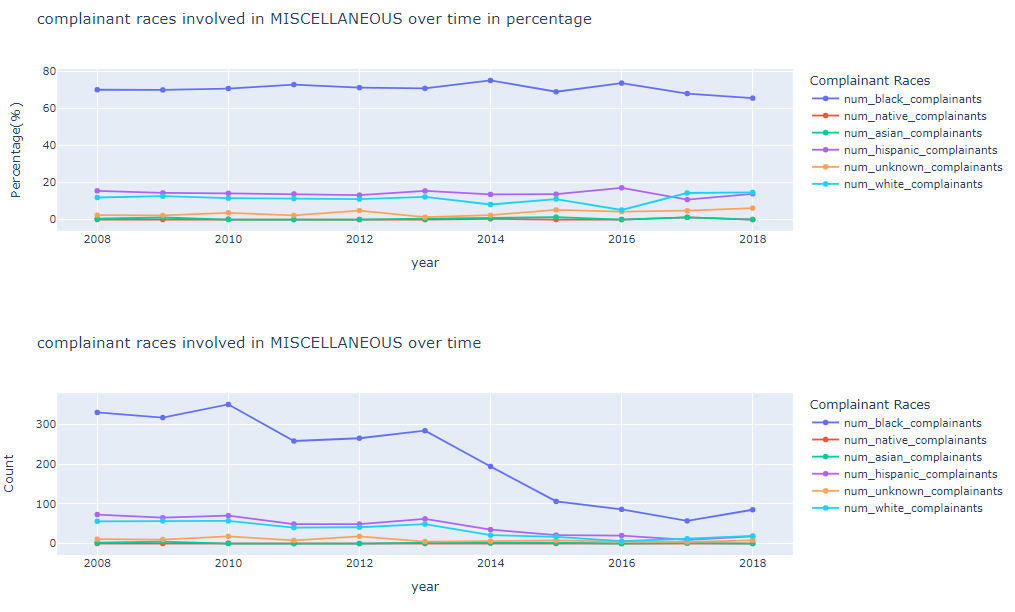

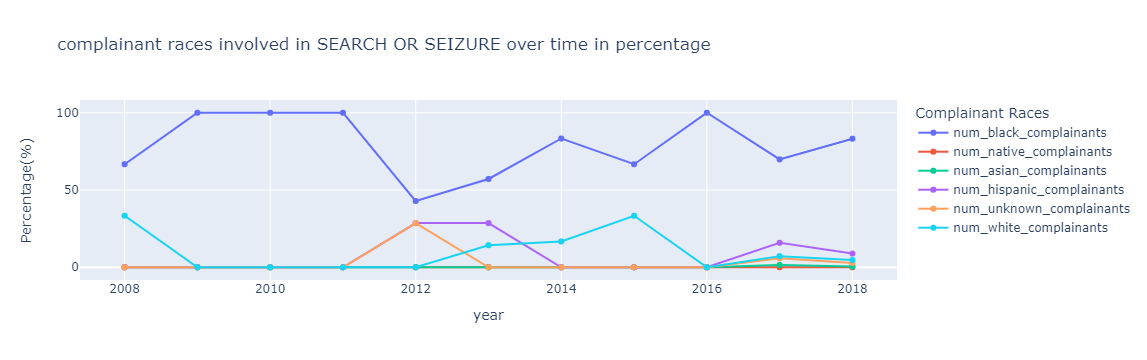

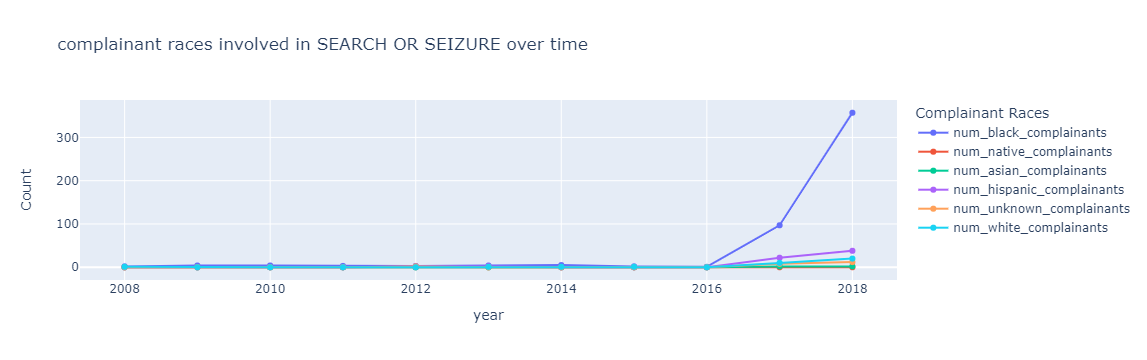

In [75]:
'''
Plots the number of complainants and the relative frequency of complainants involved SEARCH OR SEIZURE COMPLAINTS complaints between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Search or Seizure',relative=True)
plot_allegation_over_time('Search or Seizure',relative=False)

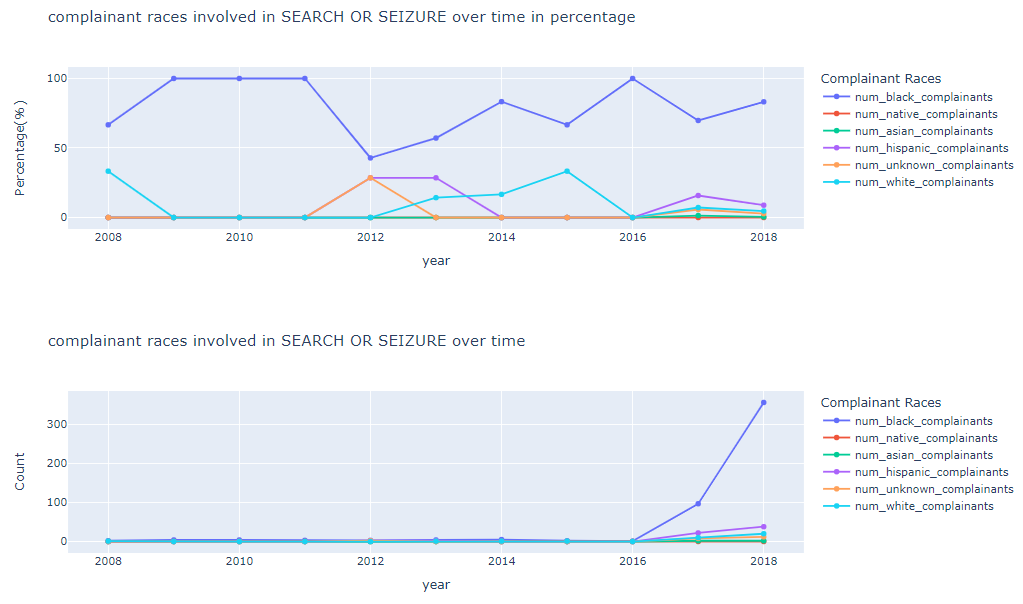

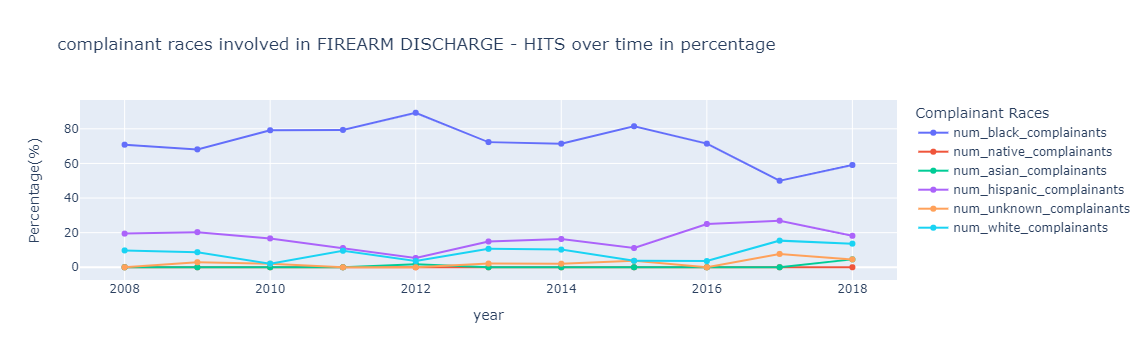

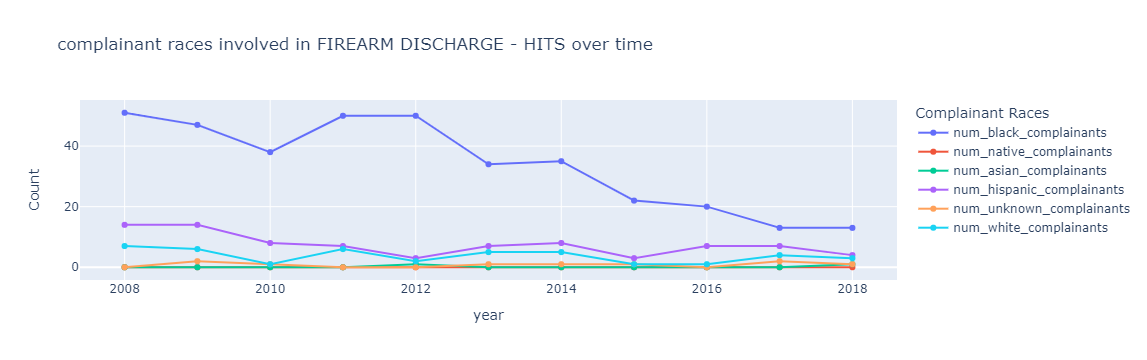

In [74]:
'''
Plots the number of complainants and the relative frequency of complaints involved FIREARM DISCHARGE - HITS  complaints between 2008 and 2018.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.

NOTE #2: The findings on this plot can be found on the readme.md on Github.
'''

plot_allegation_over_time('Firearm Discharge - Hits',relative=True)
plot_allegation_over_time('Firearm Discharge - Hits',relative=False)

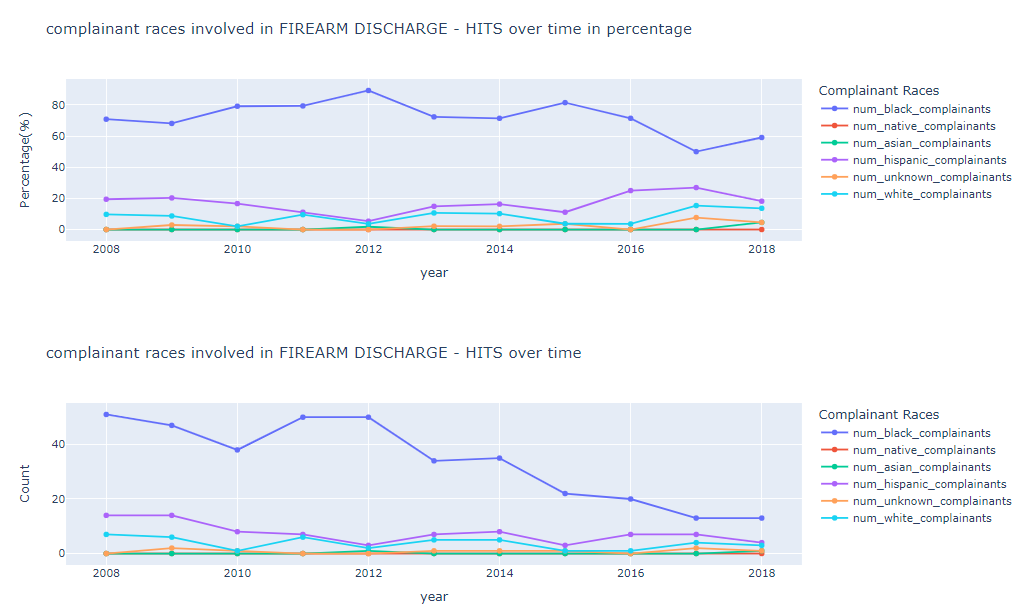

In [49]:
'''
PLEASE IGNORE
'''

complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                       'num_hispanic_complainants','num_unknown_complainants','num_white_complainants',
                       'num_complainants']

time_grouped_by_allegation = clean_data.groupby(['year','CURRENT_CATEGORY'])[complaintnant_races].sum().reset_index()

In [50]:
'''
PLEASE IGNORE
'''

races_edited = ['num_black_complainants','num_native_complainants','num_asian_complainants',
               'num_hispanic_complainants','num_unknown_complainants','num_white_complainants']

only_counts = time_grouped_by_allegation.drop('num_complainants',axis=1)
ranked_df = only_counts[races_edited].rank(method='max',axis=1)
new = only_counts[['year','CURRENT_CATEGORY']]

ranked_final = pd.merge(new, ranked_df, left_index=True, right_index=True)

years = list(range(2008,2019))

for year in years:
    filtered = ranked_final[ranked_final.year==year]

# DISTRIBUTION OF TYPES OF MISTREATMENT ALLEGATION OVER TIME

<font size="4"> <b> NOTE: THIS SECTION  IS WORK IN PROGRESS </b> </font>

The purpose of this section is to analyze the frequency of each complaint type over time.

In [52]:
'''
Filter out complaints (rows) that have empty values for "CURRENT_CATEGORY" columns and reported on 2007 and 2019.
'''

condition_1 = complaints.CURRENT_CATEGORY.notnull()
condition_2 = ~complaints.year.isin([2007,2019])

allegation_data = complaints[condition_1 & condition_2]

In [55]:
'''
Computes the number of complainants for each type of mistreatment allegation.
'''

allegation_data.CURRENT_CATEGORY.value_counts().sort_values(ascending=False)

Excessive Force                  8018
Taser Notification               4705
Miscellaneous                    2897
Verbal Abuse                     1378
Unnecessary Display of Weapon     974
Firearm Discharge at Animal       727
Civil Suits                       642
Domestic Violence                 611
Search or Seizure                 540
Firearm Discharge - Hits          449
OC Discharge                      409
Death or Injury In Custody        409
Firearm Discharge - No Hits       383
Coercion                          160
Operational Violation             127
Taser Discharge                    94
Motor Vehicle Related Death        45
Legal Violation                    21
Bias                               16
Unlawful Denial of Counsel          9
Name: CURRENT_CATEGORY, dtype: int64

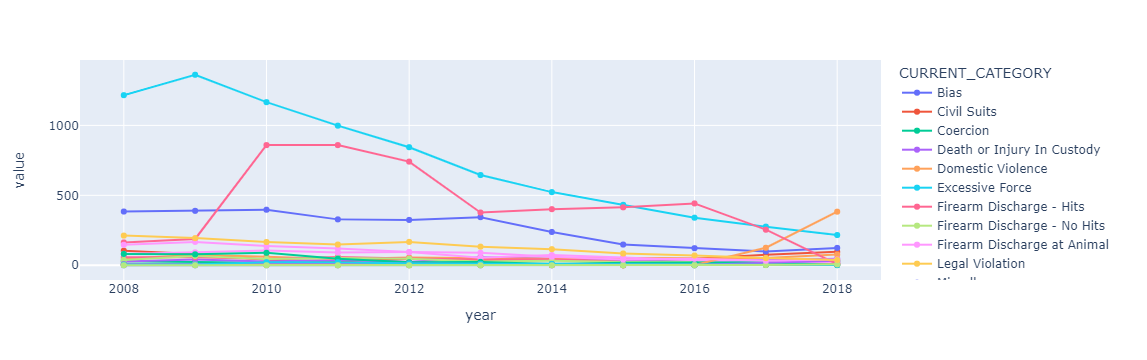

In [56]:
'''
Plots the number of mistretment allegations over time

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately GitHub does not generate the graph. To 
      see the graph, download the jupyter notebook and run it on your local machine.
'''

allegations_over_time = pd.crosstab(allegation_data.year,allegation_data.CURRENT_CATEGORY)
px.line(allegations_over_time,markers=True)

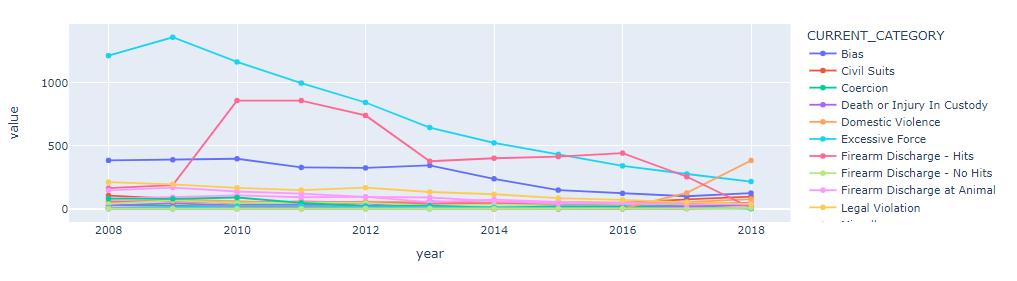

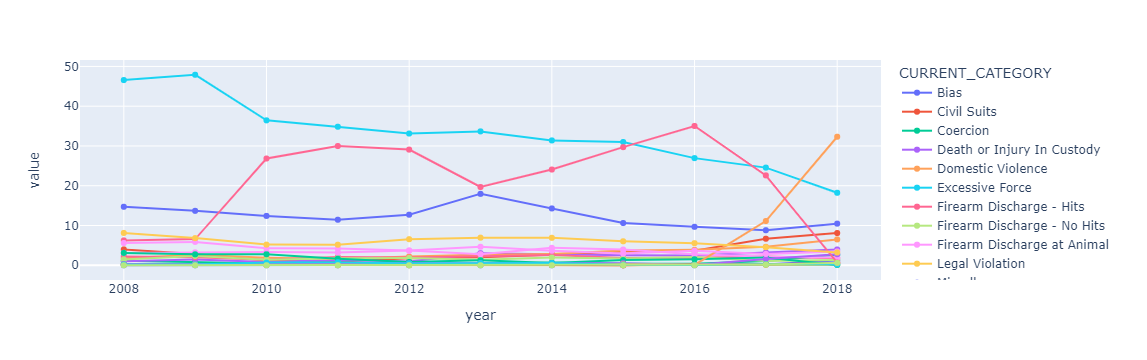

In [57]:
'''
Plots the relative frequency of mistreatment allegations over time.

NOTE: "relative frequency" means that each data point represents a percentage share of all mistreatment allegations that happened over a specific year. 

For example, in 2010, 36.43% of mistreatment allegations were Excessive Force complaints.

NOTE: The graph below is generated using the plotly library and is interactive. Unfortunately, GitHub does not generate the graph. To 
 see the graph, download the jupyter notebook and run it on your local machine.
'''

allegations_over_time_relative = allegations_over_time.copy()
allegations_over_time_relative['total_cases'] = allegations_over_time_relative.sum(axis=1)
allegations_over_time_relative = allegations_over_time_relative.divide(allegations_over_time_relative.total_cases,axis=0).drop('total_cases',axis=1)*100

px.line(allegations_over_time_relative,markers=True)

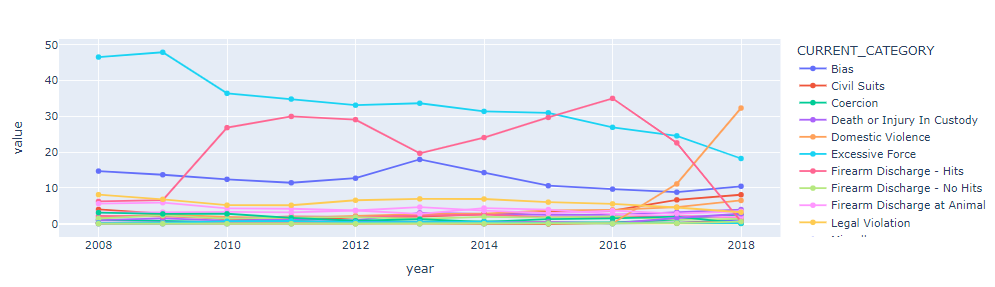

In [53]:
'''
PLEASE IGNORE
'''

def plot_case_types_over_time(relative=True,specific_allegations=[]):
    
    if relative not in [True, False]:
        print('parameter "relative" must be either: True or False')
        return False
    
    condition_1 = complaints.CURRENT_CATEGORY.notnull()
    condition_2 = ~complaints.year.isin([2007,2019])

    allegation_data = complaints[condition_1 & condition_2]
    
    data = pd.crosstab(allegation_data.year,allegation_data.CURRENT_CATEGORY)
    
    if specific_allegations:
        chart_title = "ALLEGATION TYPES: {} OVER TIME".format(specific_allegations)
        data = data[specific_allegations]
    elif not specific_allegations:
        chart_title = "ALLEGATION TYPES OVER TIME"
        
    if relative==False:
        chart = px.line(data,markers=True, title=chart_title)
        chart.show()
    elif relative==True:
        allegations_over_time_relative = data.copy()
        allegations_over_time_relative['total_cases'] = allegations_over_time_relative.sum(axis=1)
        allegations_over_time_relative = allegations_over_time_relative.divide(allegations_over_time_relative.total_cases,axis=0).drop('total_cases',axis=1)*100
        chart = px.line(allegations_over_time_relative,markers=True,title=chart_title)
        chart.show()
    

In [54]:
'''
PLEASE IGNORE
'''

def new(relative=True,specific_allegations=[]):
    
    if relative not in [True, False]:
        print('parameter "relative" must be either: True or False')
        return False
    
    condition_1 = complaints.CURRENT_CATEGORY.notnull()
    condition_2 = ~complaints.year.isin([2007,2019])

    allegation_data = complaints[condition_1 & condition_2]

    data = pd.crosstab(allegation_data.year,allegation_data.CURRENT_CATEGORY)

    if specific_allegations:
        chart_title = 0

    if relative:
        allegations_over_time_relative = data.copy()
        allegations_over_time_relative['total_cases'] = allegations_over_time_relative.sum(axis=1)
        allegations_over_time_relative = allegations_over_time_relative.divide(allegations_over_time_relative.total_cases,axis=0).drop('total_cases',axis=1)*100
        if specific_allegations:
            data_relative = allegations_over_time_relative[specific_allegations]
            chart = px.line(data_relative,markers=True)
        elif not specific_allegations: # if the list is empty
            pass
    

# ANALYZING THE RACES OF POLICE OFFICERS INVOLVED IN DIFFERENT CASE TYPES

<font size="4"> <b> NOTE: THIS SECTION  IS WORK IN PROGRESS </b> </font>
    
<font size="4"> <b> The purpose of this section is to analyze the officer races involved in different allegations. </b> </font>

SUMMARY OF FINDINGS:

The top 5 allegations against police officers are: 

1. Excessive Force                  8487
2. Taser Notification               4711
3. Miscellaneous                    3021
4. Verbal Abuse                     1463
5. Unnecessary Display of Weapon    1016

In [58]:
one_officer = complaints

In [59]:
'''
Distribution of allegations against police officers.
'''
one_officer.CURRENT_CATEGORY.value_counts().sort_values(ascending=False)

Excessive Force                  8487
Taser Notification               4711
Miscellaneous                    3021
Verbal Abuse                     1463
Unnecessary Display of Weapon    1016
Firearm Discharge at Animal       731
Civil Suits                       680
Domestic Violence                 637
Search or Seizure                 563
Firearm Discharge - Hits          460
Death or Injury In Custody        424
OC Discharge                      413
Firearm Discharge - No Hits       385
Coercion                          169
Operational Violation             135
Taser Discharge                    96
Motor Vehicle Related Death        45
Legal Violation                    21
Bias                               17
Unlawful Denial of Counsel         10
Name: CURRENT_CATEGORY, dtype: int64

In [60]:
'''
The code below generates a table that shows the distribution of 
races of involved police officers in different allegation types. 
'''

'''
NOTE(PLEASE IGNORE): This part of the analysis uses the orginal dataframe because the 
                     filtered dataframe has some rows removed when the 'RACE_OF_INVOLVED_OFFICERS' is not null.
'''
target_columns = complaints.columns[20:27]
grouped_one_officer = one_officer.groupby("CURRENT_CATEGORY")[target_columns].sum()
#total_officers_per_category = grouped_one_officer.num_police_officers.values
grouped_one_officer

num_black_officers  num_native_officers  \
CURRENT_CATEGORY                                                         
Bias                                          2.0                  0.0   
Civil Suits                                 395.0                 10.0   
Coercion                                     61.0                  0.0   
Death or Injury In Custody                  299.0                  3.0   
Domestic Violence                           270.0                  4.0   
Excessive Force                            2090.0                 31.0   
Firearm Discharge - Hits                    164.0                  1.0   
Firearm Discharge - No Hits                 140.0                  2.0   
Firearm Discharge at Animal                 248.0                  3.0   
Legal Violation                               7.0                  0.0   
Miscellaneous                               850.0                 13.0   
Motor Vehicle Related Death                  14.0                  0.0   
OC Discharge                                 79.0                  2.0   
Operational Violation                        55.0                  0.0   
Search or Seizure                           223.0                  2.0   
Taser Discharge                              37.0                  1.0   
Taser Notification                          946.0                 26.0   
Unlawful Denial of Counsel                    3.0                  1.0   
Unnecessary Display of Weapon               225.0                  4.0   
Verbal Abuse                                197.0                  6.0   

                               num_asian_officers  num_hispanic_officers  \
CURRENT_CATEGORY                                                           
Bias                                          0.0                    9.0   
Civil Suits                                  58.0                  487.0   
Coercion                                      2.0                   32.0   
Death or Injury In Custody                   20.0                  135.0   
Domestic Violence                            11.0                  144.0   
Excessive Force                             249.0                 2083.0   
Firearm Discharge - Hits                     20.0                  229.0   
Firearm Discharge - No Hits                  16.0                  113.0   
Firearm Discharge at Animal                  10.0                  214.0   
Legal Violation                               1.0                    3.0   
Miscellaneous                                84.0                  642.0   
Motor Vehicle Related Death                   3.0                   15.0   
OC Discharge                                 17.0                  122.0   
Operational Violation                         9.0                   38.0   
Search or Seizure                            40.0                  272.0   
Taser Discharge                               2.0                   30.0   
Taser Notification                          161.0                 1470.0   
Unlawful Denial of Counsel                    1.0                    1.0   
Unnecessary Display of Weapon                27.0                  227.0   
Verbal Abuse                                 26.0                  235.0   

                               num_unknown_officers  num_white_officers  \
CURRENT_CATEGORY                                                          
Bias                                            0.0                 8.0   
Civil Suits                                    16.0              1157.0   
Coercion                                        1.0               106.0   
Death or Injury In Custody                      1.0               279.0   
Domestic Violence                               3.0               265.0   
Excessive Force                                48.0              4781.0   
Firearm Discharge - Hits                        0.0               422.0   
Firearm Discharge - No Hits                     0.0   

In [61]:
'''
The code below generates a table that shows the relative frequency of the races of involved police officers in different complaint types.

For example, 47.36% of officers involved in Bias are Hispanic.
'''
percent_one_officer = grouped_one_officer[grouped_one_officer.columns[:-1]].divide(grouped_one_officer["num_police_officers"], axis="index")*100
percent_one_officer['total_percent'] = percent_one_officer.sum(axis=1)
percent_one_officer

num_black_officers  num_native_officers  \
CURRENT_CATEGORY                                                         
Bias                                    10.526316             0.000000   
Civil Suits                             18.605747             0.471032   
Coercion                                30.198020             0.000000   
Death or Injury In Custody              40.569878             0.407056   
Domestic Violence                       38.737446             0.573888   
Excessive Force                         22.516699             0.333980   
Firearm Discharge - Hits                19.617225             0.119617   
Firearm Discharge - No Hits             27.237354             0.389105   
Firearm Discharge at Animal             28.022599             0.338983   
Legal Violation                         29.166667             0.000000   
Miscellaneous                           27.741514             0.424282   
Motor Vehicle Related Death             25.454545             0.000000   
OC Discharge                            16.666667             0.421941   
Operational Violation                   29.100529             0.000000   
Search or Seizure                       22.662602             0.203252   
Taser Discharge                         28.244275             0.763359   
Taser Notification                      17.544510             0.482196   
Unlawful Denial of Counsel              27.272727             9.090909   
Unnecessary Display of Weapon           23.219814             0.412797   
Verbal Abuse                            16.765957             0.510638   

                               num_asian_officers  num_hispanic_officers  \
CURRENT_CATEGORY                                                           
Bias                                     0.000000              47.368421   
Civil Suits                              2.731983              22.939237   
Coercion                                 0.990099              15.841584   
Death or Injury In Custody               2.713704              18.317503   
Domestic Violence                        1.578192              20.659971   
Excessive Force                          2.682612              22.441284   
Firearm Discharge - Hits                 2.392344              27.392344   
Firearm Discharge - No Hits              3.112840              21.984436   
Firearm Discharge at Animal              1.129944              24.180791   
Legal Violation                          4.166667              12.500000   
Miscellaneous                            2.741514              20.953003   
Motor Vehicle Related Death              5.454545              27.272727   
OC Discharge                             3.586498              25.738397   
Operational Violation                    4.761905              20.105820   
Search or Seizure                        4.065041              27.642276   
Taser Discharge                          1.526718              22.900763   
Taser Notification                       2.985905              27.262611   
Unlawful Denial of Counsel               9.090909               9.090909   
Unnecessary Display of Weapon            2.786378              23.426213   
Verbal Abuse                             2.212766              20.000000   

                               num_unknown_officers  num_white_officers  \
CURRENT_CATEGORY                                                          
Bias                                       0.000000           42.105263   
Civil Suits                                0.753650           54.498351   
Coercion                                   0.495050           52.475248   
Death or Injury In Custody                 0.135685           37.856174   
Domestic Violence                          0.430416           38.020086   
Excessive Force                            0.517130           51.508296   
Firearm Discharge - Hits                   0.000000           50.478469   
Firearm Discharge - No Hits                0.000000   

In [62]:
complaints.FINDING_CODE.value_counts()

No Finding       8202
NO AFFIDAVIT     5925
NOT SUSTAINED    4767
UNFOUNDED        2349
SUSTAINED        1002
EXONERATED        123
Name: FINDING_CODE, dtype: int64

In [63]:
complaints.CURRENT_STATUS.value_counts()

Closed                   22104
Pending Investigation     1188
Pending CPD Review         225
Undefined                   23
Pending Police Board         9
Suspended                    5
Pending DOL Review           1
Pending Discipline           1
Name: CURRENT_STATUS, dtype: int64

# APPENDIX (PLEASE IGNORE)

These code snippets are irrelevant to the primary findings

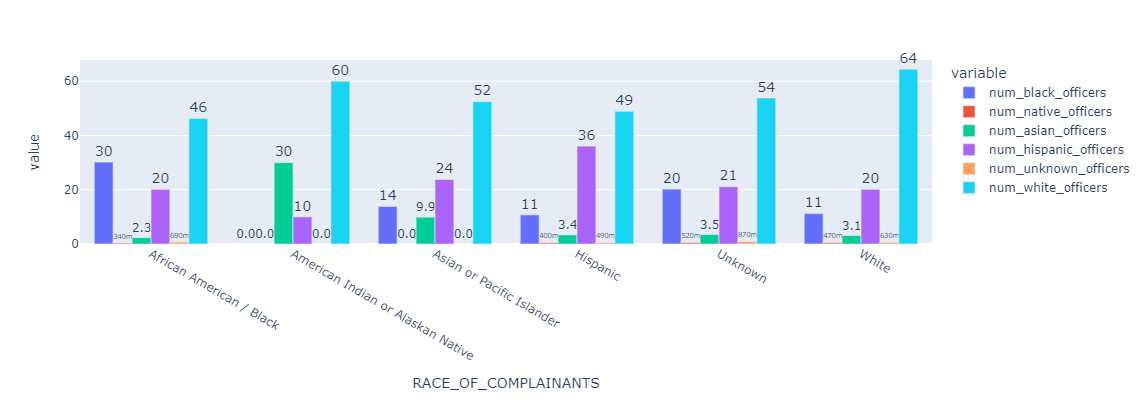

In [64]:
one_complainant = filtered_complaints[filtered_complaints.num_complainants==1]

officer_columns = ['num_black_officers','num_native_officers','num_asian_officers',
                       'num_hispanic_officers','num_unknown_officers','num_white_officers']

grouped = one_complainant.groupby('RACE_OF_COMPLAINANTS')[officer_columns].sum()

grouped['num_officers'] = grouped.sum(axis=1)

grouped_percent = (grouped.divide(grouped['num_officers'],axis=0)*100)

chart = px.bar(grouped_percent.drop('num_officers',axis=1), barmode='group', height=400, width = 800, text_auto='.2s')

chart.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
    
chart.show()

In [65]:
percent_60 = relative_frequency_grouped(majority_percentage=60).rename(columns={'relative_freq':'60_percent'})
percent_75 = relative_frequency_grouped(majority_percentage=75).rename(columns={'relative_freq':'75_percent'})
percent_100 = relative_frequency_grouped(majority_percentage=100).rename(columns={'relative_freq':'100_percent'})

merge1 = pd.merge(percent_60,percent_75,how='inner',on=['percentage_officer','complianant_majority_class'])
majority_comparison = pd.merge(merge1,percent_100, how='inner', on=['percentage_officer','complianant_majority_class'])
majority_comparison = majority_comparison[['percentage_officer','complianant_majority_class','60_percent','75_percent','100_percent']]
majority_comparison['100_60_abs_diff'] = (majority_comparison['100_percent']-majority_comparison['60_percent']).abs()
majority_comparison['100_75_abs_diff'] = (majority_comparison['100_percent']-majority_comparison['75_percent']).abs()

In [66]:
def plot_officer_sums(officer_sums,race_name):
    
    chart = officer_sums.sort_values().plot(kind='barh',figsize=(9,6))
    plt.title('dist. of officer races where the majority of complainants are {}'.format(race_name))
    for i, v in enumerate(officer_sums.sort_values().values):
        chart.text(v+2, i, v)
    
    plt.show()

def plot_officer_percents(officer_sums_percent, race_name):
    
    chart = officer_sums_percent.sort_values().plot(kind='barh',figsize=(9,6))
    plt.title('relative frequency of officer races where the majority of complainants are {}'.format(race_name))
    for i, v in enumerate(officer_sums_percent.sort_values().round(1).values):
        chart.text(v+0.5, i, str(v)+'%')
    
    plt.show()

def plot_race_majority(complainant_race_column,majority_percentage=65):
    
    valid_columns = ['black_complainants_percent','native_complainants_percent','asian_complainants_percent',
                     'hispanic_complainants_percent','unknown_complainants_percent','white_complainants_percent']

    officer_columns = ['num_black_officers','num_native_officers','num_asian_officers',
                       'num_hispanic_officers','num_unknown_officers','num_white_officers']
    
    chart_name_dict = dict(zip(valid_columns,['Black','Native','Asian','Hispanic','Unknown','White']))

    if str(complainant_race_column) not in valid_columns:
        print("column {} is not a valid column".format(complainant_race_column))
        return False

    race_majority_only = filtered_complaints[filtered_complaints[complainant_race_column] >= majority_percentage]
    
    chart_race_name = chart_name_dict[str(complainant_race_column)]
    
    num_complaints = len(race_majority_only)
    
    print("NUMBER_OF_COMPLAINTS FOR MAJORITY: {} = {}".format(chart_race_name,num_complaints))

    officer_sums = race_majority_only[officer_columns].sum()
    officer_sums_percent = officer_sums/race_majority_only['num_police_officers'].sum()*100
    
    sums_chart = plot_officer_sums(officer_sums,chart_race_name)
    sums_percent_chart = plot_officer_percents(officer_sums_percent,chart_race_name)
    

In [67]:
def total_grouped(majority_percentage=75):
    
    majority_columns = ['black_complainants_percent','native_complainants_percent','asian_complainants_percent',
                     'hispanic_complainants_percent','unknown_complainants_percent','white_complainants_percent']
    
    officer_columns = ['num_black_officers','num_native_officers','num_asian_officers',
                       'num_hispanic_officers','num_unknown_officers','num_white_officers']
    
    majority_name_dict = dict(zip(majority_columns,['Black','Native','Asian','Hispanic','Unknown','White']))
    
    temp_df_list = []
    
    for race_column in majority_columns:
        race_majority_only = filtered_complaints[filtered_complaints[race_column] >= majority_percentage]
        
        officer_sums = race_majority_only[officer_columns].sum()
        
        temp_df = officer_sums.to_frame().reset_index().rename(columns={'index':'total_officers', 0:'total'})
        temp_df['complianant_majority_class'] =  majority_name_dict[race_column] 
                      
        temp_df_list.append(temp_df)
    
    combined_df =  pd.concat(temp_df_list)
    
    return combined_df

def plot_total_grouped(combined_df):
    
    chart = px.bar(combined_df, x='complianant_majority_class', y="total",
             color='total_officers', barmode='group', height=400, width = 800, text_auto='.2s')
    
    chart.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)
    
    chart.show()
    

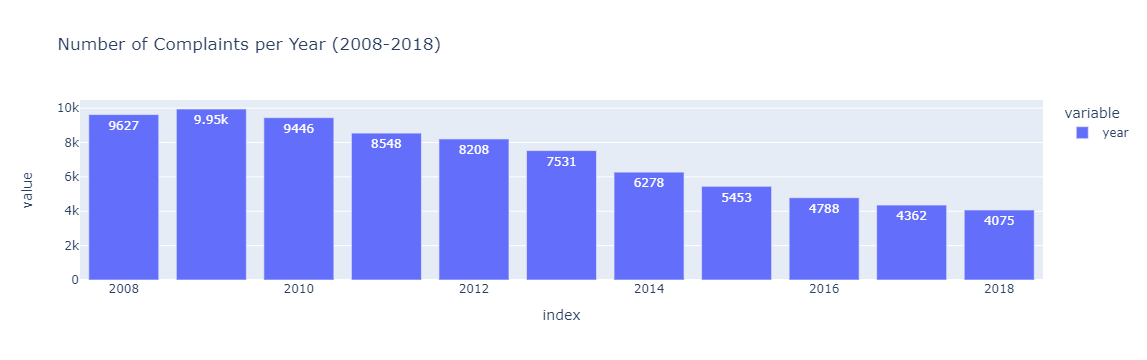

In [68]:
'''
Number of Complaints per Year (2008-2018)

NOTE: This includes BIA. BIA is an Chicago Police Department's internal review board. 
'''

original = pd.read_csv(r"C:\Users\Angelo Gaerlan\Desktop\Data Science\Data Sets\Chicago COPA\chicago COPA cases 2021\copa-cases-summary.csv")
original['COMPLAINT_DATE'] = pd.to_datetime(original.COMPLAINT_DATE)
original['year'] = original.COMPLAINT_DATE.dt.year


year_filter = ~original.year.isin([2007,2019])

num_complaints_yearly = original[year_filter].year.value_counts().sort_index()
px.bar(num_complaints_yearly,text_auto=True,title='Number of Complaints per Year (2008-2018)')